# Problem Statement:
An E Commerce company or DTH provider is
facing a lot of competition in the current market and it has become a challenge to retain the
existing customers in the current situation. Hence, the company wants to develop a model
through which they can do churn prediction of the accounts and provide segmented offers to the
potential churners. In this company, account churn is a major thing because 1 account can have
multiple customers. hence by losing one account the company might be losing more than one
customer.
You have been assigned to develop a churn prediction model for this company and provide
business recommendations on the campaign.
Your campaign suggestion should be unique and be very clear on the campaign offer because
your recommendation will go through the revenue assurance team. If they find that you are
giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going
to approve your recommendation.
Hence be very careful while providing campaign recommendation.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_dict=pd.read_excel("/content/drive/MyDrive/Great Learnings Business Analyst/CAPSTONE project/My project/CC_EDTH_02_Customer Churn/Customer Churn Data.xlsx")

In [ ]:
data_source=pd.read_excel("/content/drive/MyDrive/Great Learnings Business Analyst/CAPSTONE project/My project/CC_EDTH_02_Customer Churn/Customer Churn Data.xlsx",sheet_name='Data for DSBA')

In [ ]:
data=data_source.copy()

In [ ]:
data.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [ ]:
data.shape

(11260, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [ ]:
data.describe()

,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.00000,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,25629.50000,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,3250.62635,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,20000.00000,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,22814.75000,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,25629.50000,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,28444.25000,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,31259.00000,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum().sum()

2676

In [ ]:
(data.isnull().sum()/len(data))*100

AccountID                  0.000000
Churn                      0.000000
Tenure                     0.905861
City_Tier                  0.994671
CC_Contacted_LY            0.905861
Payment                    0.968028
Gender                     0.959147
Service_Score              0.870337
Account_user_count         0.994671
account_segment            0.861456
CC_Agent_Score             1.030195
Marital_Status             1.882771
rev_per_month              0.905861
Complain_ly                3.170515
rev_growth_yoy             0.000000
coupon_used_for_payment    0.000000
Day_Since_CC_connect       3.170515
cashback                   4.182948
Login_device               1.962700
dtype: float64

In [ ]:
datax=data.drop('Churn',axis=1)
datay=data.pop('Churn')

### Understanding of attributes (variable info, renaming if required)

In [ ]:
def attributes(data) :
  for i in data.columns:
    print(i)
    if data[i].dtype=='object':
      print('Categorical')
      print('\n')
      print('Unique')
      print(data[i].unique())
      # print('\n')
      print('Mode')
      print(data[i].mode()[0])
      print('\n')
    else:
      print('Continous')
      print('\n')
      print('Unique')
      print(data[i].unique())
      # print('\n')
      print('Mean')
      print(data[i].mean())
      # print('\n')
      print('Median')
      print(data[i].median())
      # print('\n')
      print('Mode')
      print(data[i].mode()[0])
      print('\n')
attributes(datax)

AccountID
Continous


Unique
[20000 20001 20002 ... 31257 31258 31259]
Mean
25629.5
Median
25629.5
Mode
20000


Tenure
Categorical


Unique
[4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]
Mode
1


City_Tier
Continous


Unique
[ 3.  1. nan  2.]
Mean
1.653928955866523
Median
1.0
Mode
1.0


CC_Contacted_LY
Continous


Unique
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  nan  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41.
 132.  43. 129.]
Mean
17.867090876501166
Median
16.0
Mode
14.0


Payment
Categorical


Unique
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]
Mode
Debit Card


Gender
Categorical


Unique
['Female' 'Male' 'F' nan 'M']
Mode
Male


Service_Score
Continous


Unique
[ 3.  2.  1. nan  0.  4.  5.]
Mean
2.9025264289553845
Median
3.0
Mode
3.0


Account_user_count
Categorical


Unique

#### Observation: 
There are special characters and missing values in the dataset. Some attributes doesnt have proper datatype. we will perform the data cleaning before EDA. We will convert all the special characters to Missing values and then correct the data type.

After that we will perform EDA.

In [ ]:
#converting the special characters in integer columns
integer=['Tenure','Account_user_count','rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']
for i in integer:
  for j in range(len(datax)):
    try:
      datax[i][j]=float(datax[i][j])
    except:
      datax[i][j]=np.nan

In [ ]:
(datax.isnull().sum()/len(data))*100

AccountID                  0.000000
Tenure                     1.936057
City_Tier                  0.994671
CC_Contacted_LY            0.905861
Payment                    0.968028
Gender                     0.959147
Service_Score              0.870337
Account_user_count         3.943162
account_segment            0.861456
CC_Agent_Score             1.030195
Marital_Status             1.882771
rev_per_month              7.024867
Complain_ly                3.170515
rev_growth_yoy             0.026643
coupon_used_for_payment    0.026643
Day_Since_CC_connect       3.179396
cashback                   4.200710
Login_device               1.962700
dtype: float64

In [ ]:
# Replacing the special characters in categorical columns

datax['Gender']=datax.Gender.replace('M','Male').replace('F','Female')
datax['account_segment']=datax.account_segment.replace('Regular +','Regular Plus').replace('Super +','Super Plus')
datax['Login_device']=datax.Login_device.replace('&&&&',np.nan)

In [ ]:
data=pd.concat([datax,datay],axis=1)
for i in data.columns:
  if i in integer:
    data[i]=data[i].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [ ]:
data['Complain_ly']=data['Complain_ly'].astype(object)
data['City_Tier']=data['City_Tier'].astype(object)
data['Service_Score']=data['Service_Score'].astype(object)
data['CC_Agent_Score']=data['CC_Agent_Score'].astype(object)
data['Churn']=data['Churn'].astype(object)
data['Account_user_count']=data['Account_user_count'].astype(object)
data['coupon_used_for_payment']=data['coupon_used_for_payment'].astype(object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  object 
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  object 
 7   Account_user_count       10816 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  object 
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  object 
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [ ]:
attributes(data)

AccountID
Continous


Unique
[20000 20001 20002 ... 31257 31258 31259]
Mean
25629.5
Median
25629.5
Mode
20000


Tenure
Continous


Unique
[ 4.  0.  2. 13. 11. nan  9. 99. 19. 20. 14.  8. 26. 18.  5. 30.  7.  1.
 23.  3. 29.  6. 28. 24. 25. 16. 10. 15. 22. 27. 12. 21. 17. 50. 60. 31.
 51. 61.]
Mean
11.025086035138562
Median
9.0
Mode
1.0


City_Tier
Categorical


Unique
[3.0 1.0 nan 2.0]
Mode
1.0


CC_Contacted_LY
Continous


Unique
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  nan  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41.
 132.  43. 129.]
Mean
17.867090876501166
Median
16.0
Mode
14.0


Payment
Categorical


Unique
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]
Mode
Debit Card


Gender
Categorical


Unique
['Female' 'Male' nan]
Mode
Male


Service_Score
Categorical


Unique
[3.0 2.0 1.0 nan 0.0 4.0 5.0]
Mode
3.0


Account_user_count
Categorical




In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

AccountID                    0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
Churn                        0
dtype: int64

### Observation:
There are no duplicate values present in the dataset but there are null values

### Univariate Analysis

In [ ]:
def plot(data,col):
  for i in col:
    mean=data[i].mean()
    median=data[i].median()
    mode=data[i].mode()[0]

    fig,axes=plt.subplots(nrows=18,ncols=2)
    fig.set_size_inches(12,3)
    plt.subplot(1,2,1)
    p=sns.distplot(data[i])
    plt.axvline(mean,color='red',label='Mean')
    plt.axvline(median,color='blue',label='Median')
    plt.axvline(mode,color='green',label='Mode')
    p.set_title(i,fontsize=15)
    plt.subplot(1,2,2)
    p=sns.boxplot(data[i],orient='v')
    p.set_title(i,fontsize=15)

  plt.legend()
  plt.show()

In [ ]:
inte=[]
for i in data.columns:
  if data[i].dtype!='object':
    inte.append(i)
inte.remove('AccountID')

In [ ]:
data[inte].describe()

,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,Day_Since_CC_connect,cashback
count,11042.000000,11158.000000,10469.000000,11257.000000,10902.000000,10787.000000
mean,11.025086,17.867091,6.362594,16.193391,4.633187,196.236370
std,12.879782,8.853269,11.909686,3.757721,3.697637,178.660514
min,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000
25%,2.000000,11.000000,3.000000,13.000000,2.000000,147.210000
50%,9.000000,16.000000,5.000000,15.000000,3.000000,165.250000
75%,16.000000,23.000000,7.000000,19.000000,8.000000,200.010000
max,99.000000,132.000000,140.000000,28.000000,47.000000,1997.000000


In [ ]:
data[inte].median()

Tenure                    9.00
CC_Contacted_LY          16.00
rev_per_month             5.00
rev_growth_yoy           15.00
Day_Since_CC_connect      3.00
cashback                165.25
dtype: float64

In [ ]:
for i in data[inte]:
  print('Mode of '+str(i)+' is '+str(data[i].mode()[0]))

Mode of Tenure is 1.0
Mode of CC_Contacted_LY is 14.0
Mode of rev_per_month is 3.0
Mode of rev_growth_yoy is 14.0
Mode of Day_Since_CC_connect is 3.0
Mode of cashback is 155.62


### Univariate Observations for Continous Variables:
**Tenure:**
This is a continous variable ranging from 0 to 99 with mean as 11.02 and standard deviation 12.87. There are outliers present in the dataset and the distribution is right skewed. The median and mode of the distributions are 9 and 1. The most common tenure used by customer is 1 and based on the yearly average data available we assume the tenure is for 1 year.

**CC_Contacted_LY:**
This is a continous variable ranging from 4 to 132 times, which is the number of times a customer called customer care for help. The Mean value is 17.86 and standard deviation of 8.85. The distribution is right skewed due to the outliers. The median and mode of the distributions are 16 and 14. The most common last contacted day is 14th day.

**Rev_per_month:**
This is a continous variable which represent the Monthly average revenue generated by account in last 12 months and it ranges from 1 to 140 with mean as 6.36 and standard deviation as 11.90. From the 75th percentile and max value we can observe there is a drastic change which represents a potential outlier present. There data is right skewed due to that outlier. The median and mode of the distributions are 5 and 3.

**Rev_growth_yoy:**
This is a continous variable which represent the revenue earning of previous year compared to the year before that. The value ranges from 4 to 28 with mean as 16.19 and standard deviation as 3.75. As the standard deviation is less and mean is 5 times higher to that we can consider as a steady increase without much fluctutations from previous year. There are no outliers present in this variable and it represents a normal distribution with slight skewness towards right side. The median and mode of the distributions are 15 and 14.

**Day_since_CC_connect:**
This is a continous variable which represents the days since a customer last contacted the customer care. The value ranges from 0 to 47 with average days of 4.6 and standard deviation of 3.69. From the 75th percentile to max value we can observe a sudden increase so there are outliers present in the dataset and due to which the data is skewed rightside. The median and mode of the distributions are 3 and 3.

**Cashback:**
This continous variable represents the cashback value generated by the account(customer) in the last 12 months. The value ranges from 0 to 1997 with mean value as 831 and standard deviation as 855. There are no outliers present in this variable. The median and mode of the distributions are 194 and 155.60.


No handles with labels found to put in legend.


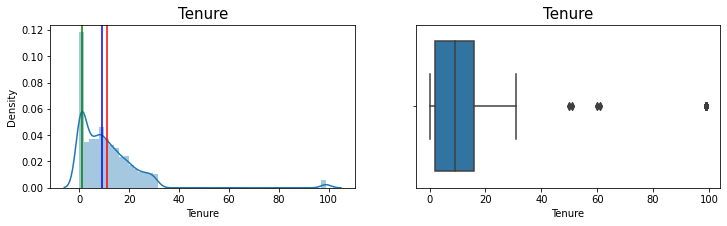

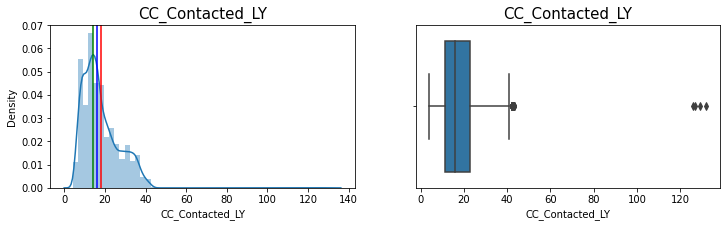

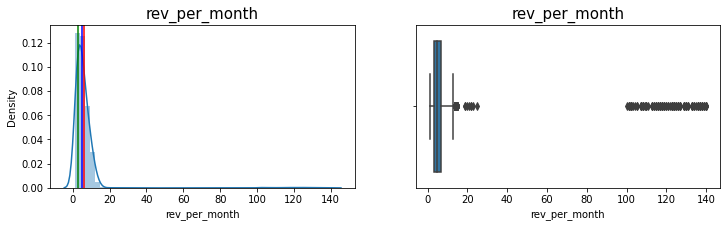

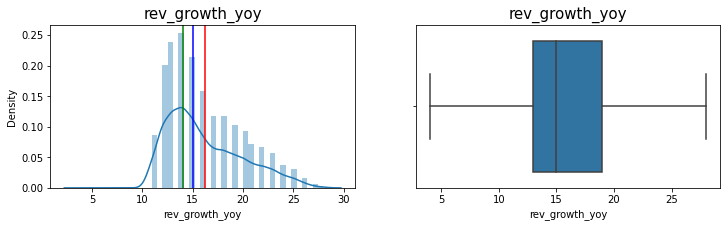

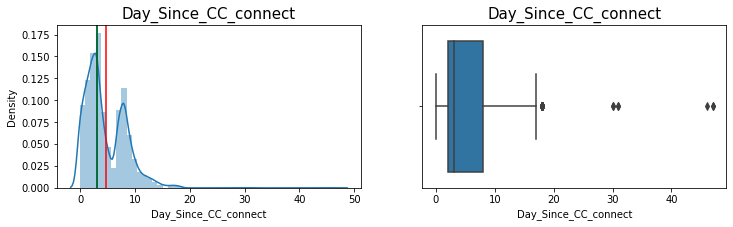

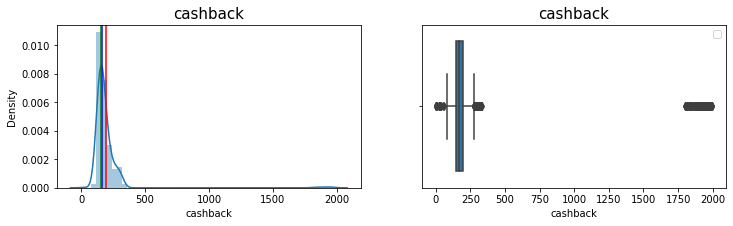

In [ ]:
plot(data,inte);

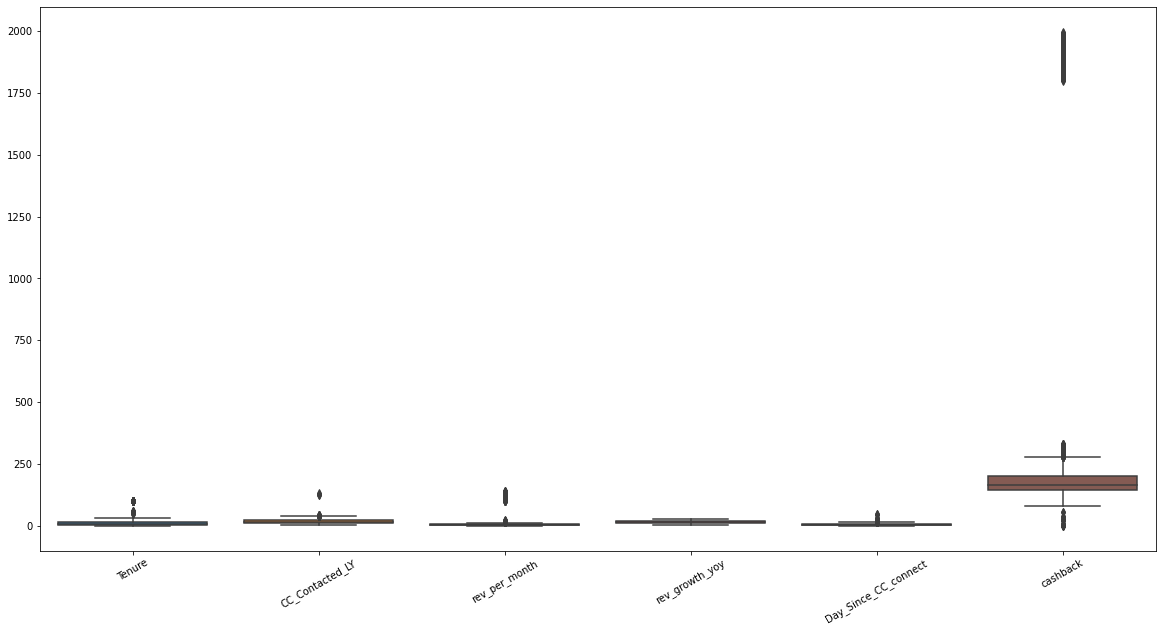

In [ ]:
plt.figure(figsize=(20,10))
box=sns.boxplot(data=data[inte]);
box.set_xticklabels(box.get_xticklabels(),rotation=30);

### Univariate Analysis Categorical variables

### Categorical variables describe

In [ ]:
catego=[]
for i in data.columns:
  if data[i].dtype=='object':
    catego.append(i)
catego

['City_Tier',
 'Payment',
 'Gender',
 'Service_Score',
 'Account_user_count',
 'account_segment',
 'CC_Agent_Score',
 'Marital_Status',
 'Complain_ly',
 'coupon_used_for_payment',
 'Login_device',
 'Churn']

In [ ]:
data[catego].describe().T

,count,unique,top,freq
City_Tier,11148,3,1,7263
Payment,11151,5,Debit Card,4587
Gender,11152,2,Male,6704
Service_Score,11162,6,3,5490
Account_user_count,10816,6,4,4569
account_segment,11163,5,Regular Plus,4124
CC_Agent_Score,11144,5,3,3360
Marital_Status,11048,3,Married,5860
Complain_ly,10903,2,0,7792
coupon_used_for_payment,11257,17,1,4373


### Observation:
City Tier: count is 11148, have null values, 3 unique levels and most available is 1 with frequency 7263.

Payment: count is 11151, have null values, 5 unique levels and most available is Debit cart with frequency 4587

Gender: count is 11152, have null values, 2 unique levels and most available is Male with frequency 6704

Service score: count is 11162, have null values, 6 unique levels and most available is 3 with frequency 5490

Account user count: count is 10816, have null values, 6 unique levels and most available is 4 with frequency 4569

Account segment: count is 11163, have null values, 5 unique levels and most available is Regular Plus with frequency 4124

CC_Agent_Score: count is 11144, have null values, 5 unique levels and most available is 3 with frequency 3360

Marital_status: count is 11048, have null values, 3 unique levels and most available is Married with frequency 5860

Complain_ly: count is 10903, have null values, 2 unique levels and most available is 0 with frequency 7792

Coupon_used_for_payment: count is 11257, have null values, 17 unique levels and most available is 1 with frequency 4373

Login device: count is 10500, have null values, 2 unique levels and most available is Mobile with frequency 7482

Churn: count is 11260, have null values, 2 unique levels and most available is 0 with frequency 9364

In [ ]:
cat=[]
for i in data.columns:
  if data[i].dtype=='object':
    cat.append(i)
cat

['City_Tier',
 'Payment',
 'Gender',
 'Service_Score',
 'Account_user_count',
 'account_segment',
 'CC_Agent_Score',
 'Marital_Status',
 'Complain_ly',
 'coupon_used_for_payment',
 'Login_device',
 'Churn']

City_Tier


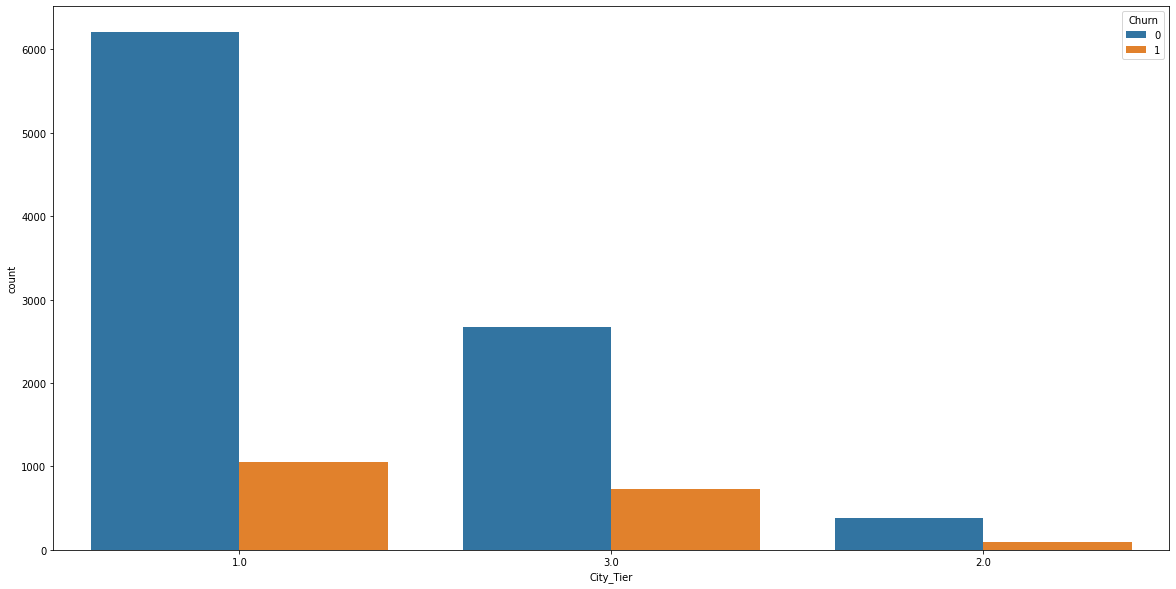

Payment


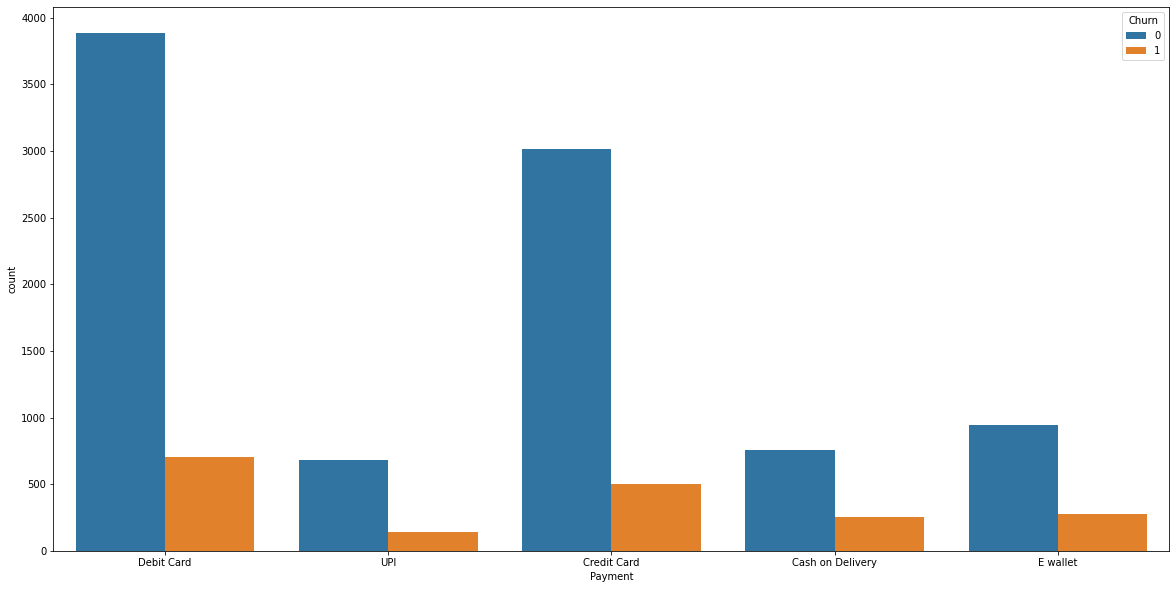

Gender


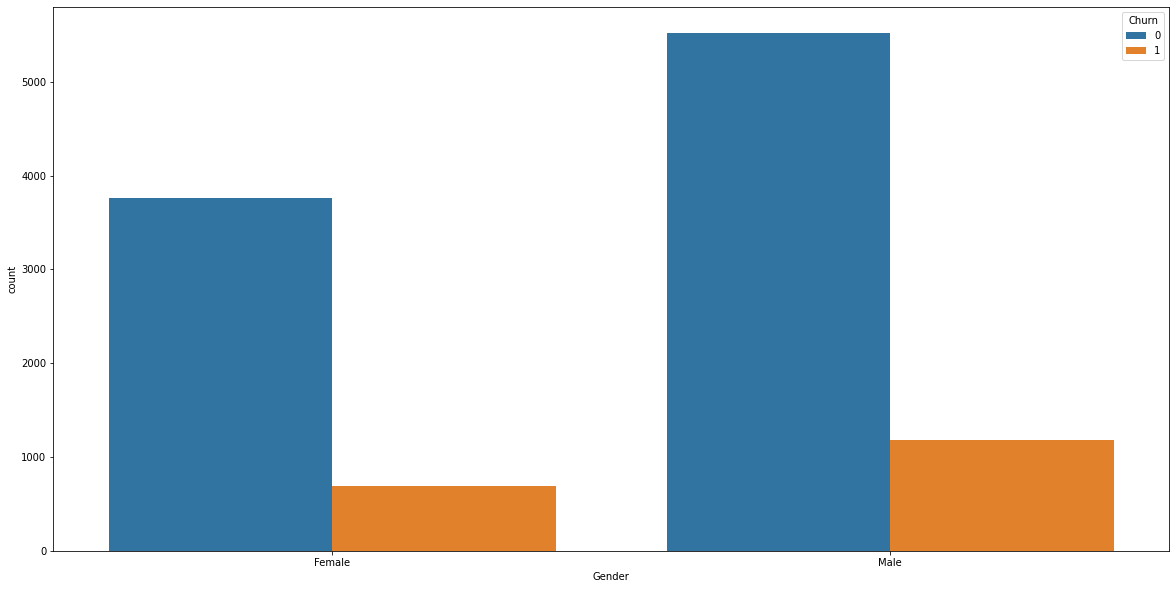

Service_Score


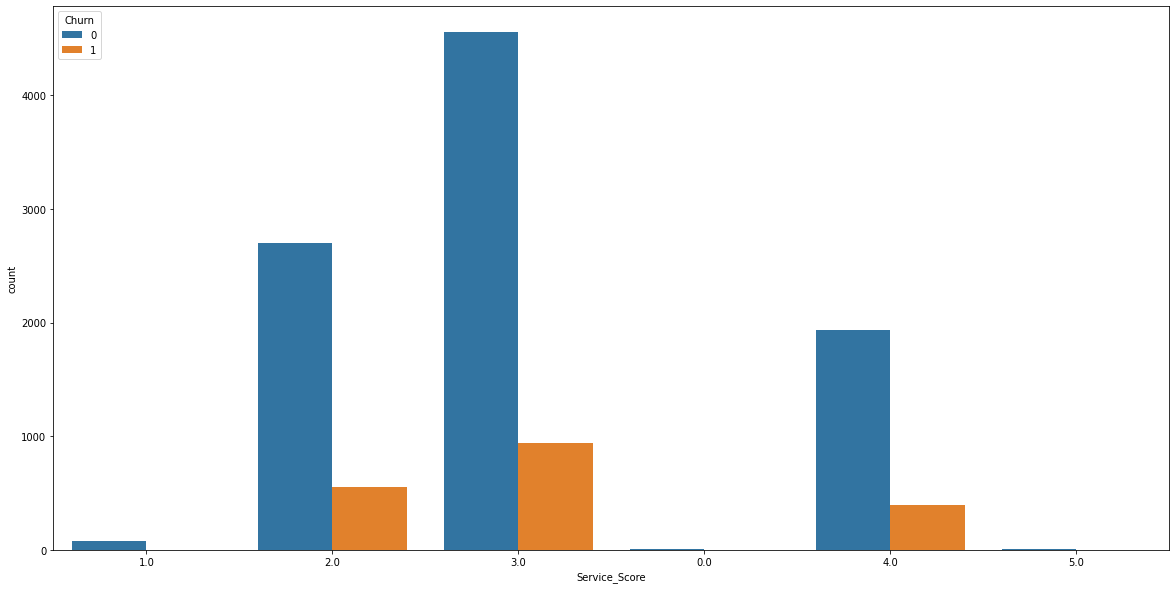

Account_user_count


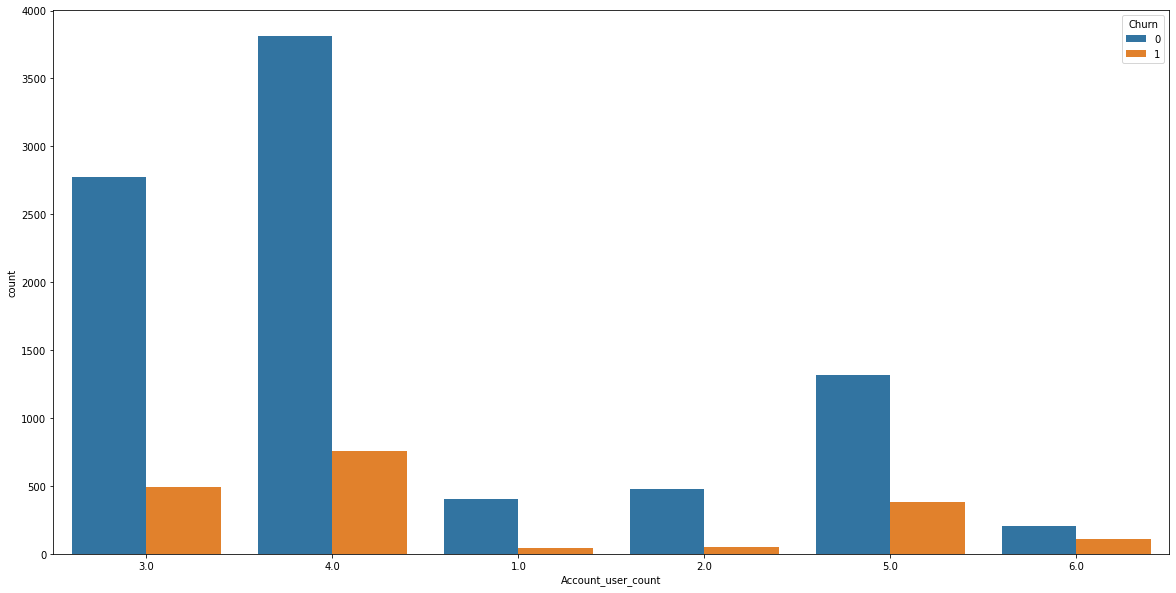

account_segment


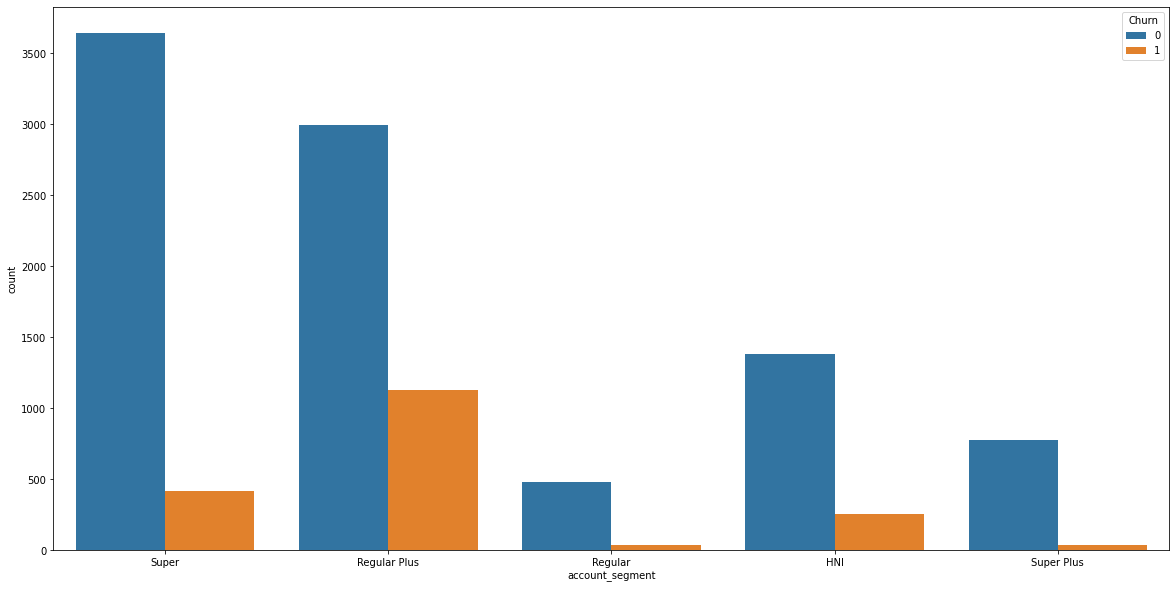

CC_Agent_Score


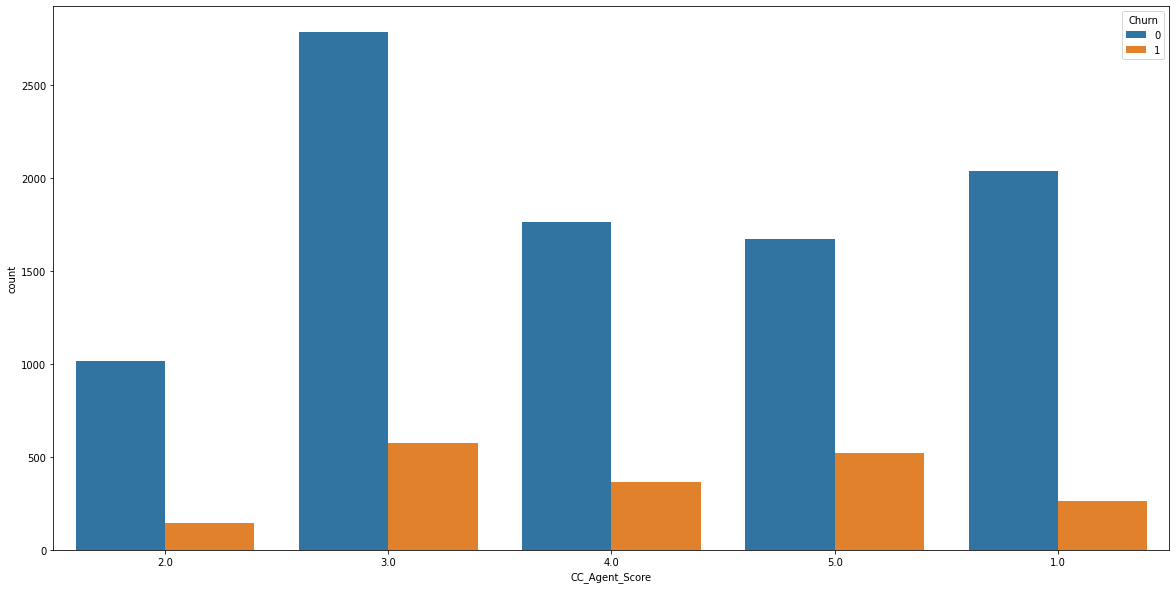

Marital_Status


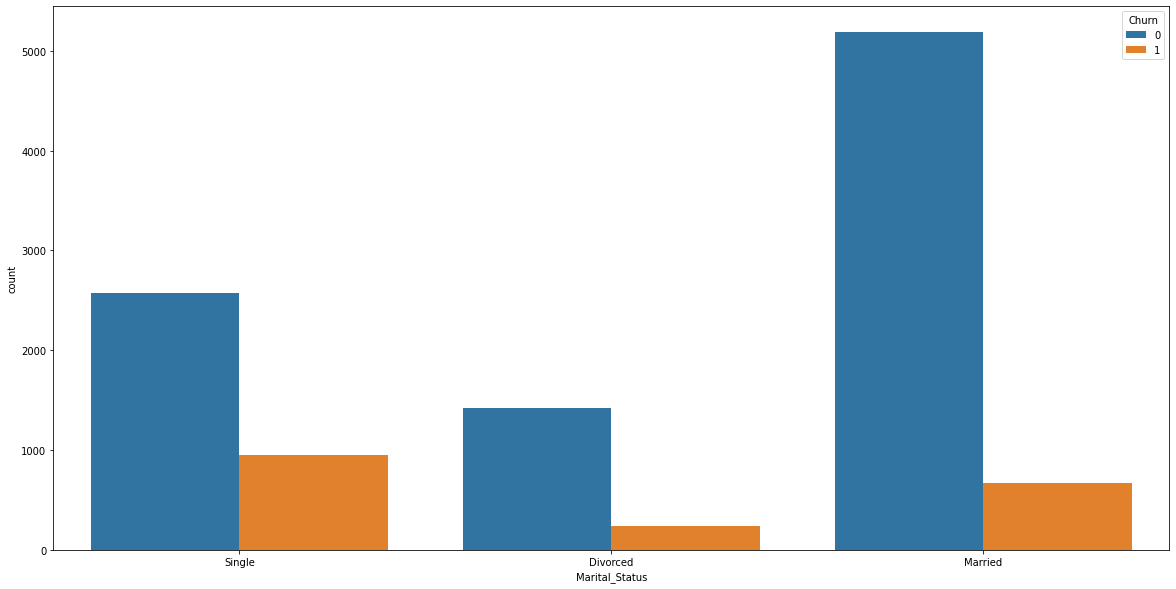

Complain_ly


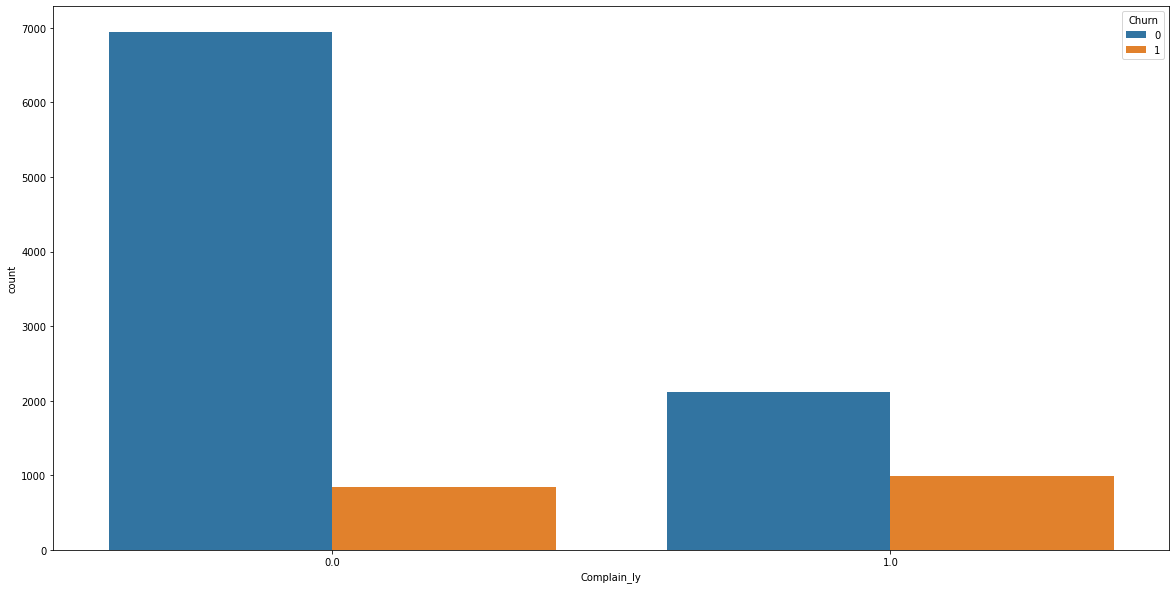

coupon_used_for_payment


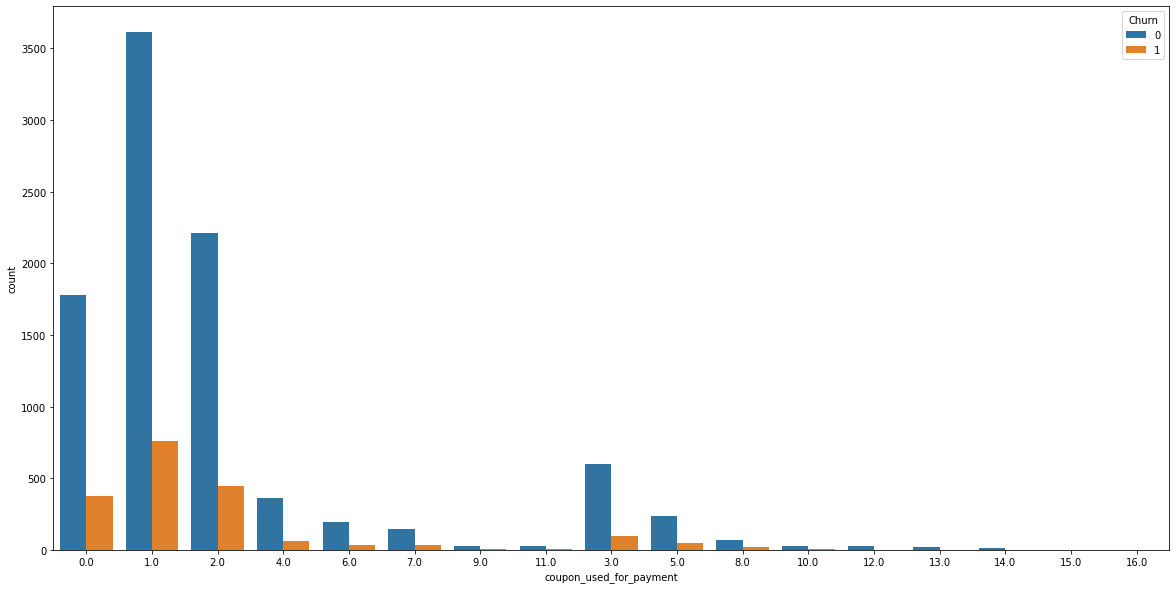

Login_device


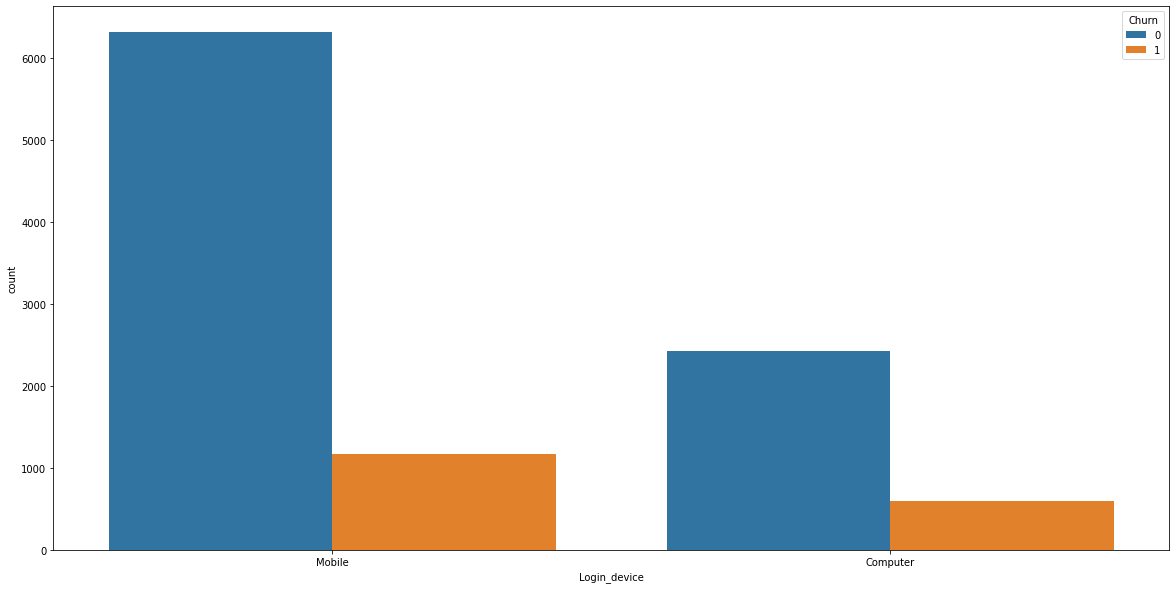

Churn


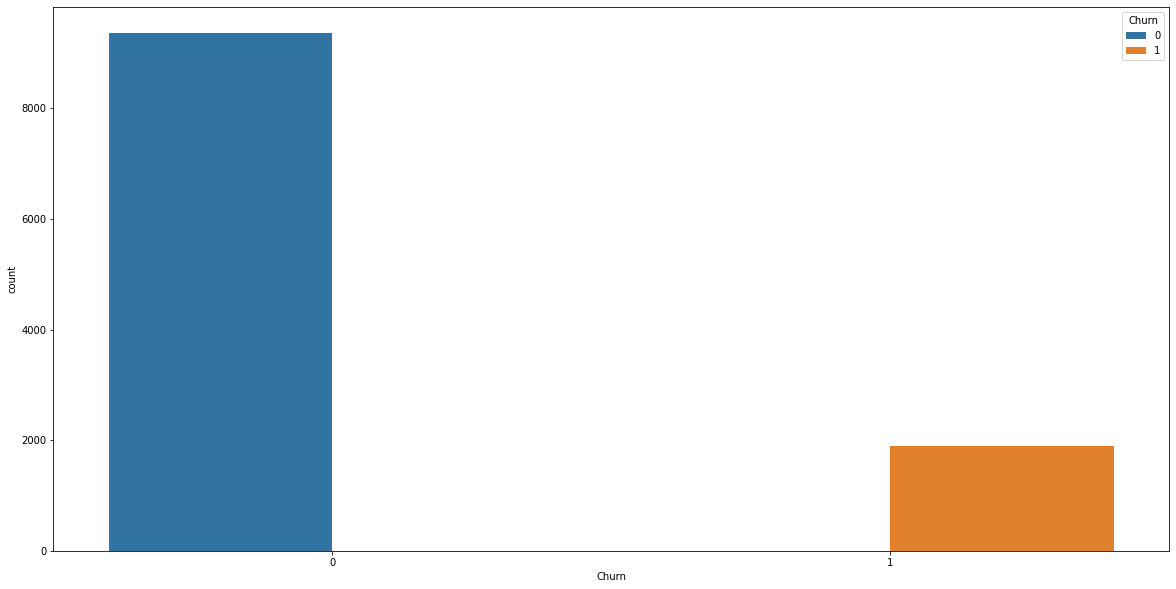

In [ ]:
for i in data[cat]:
  print(i)
  plt.figure(figsize=(20,10))
  sns.countplot(data=data,x=data[i],hue='Churn')
  plt.show()

### Observation:
**City_Tier:**Tier of primary customer's city 
From the above count plot we can observe the highest primary customers are from city 1 and lowest from city 2. From the Churn hue we can observe that city 3 churn ratio is higher compared to other cities.

**Payment:** Preferred Payment mode of the customers in the account 
From the above count plot we can observe that the payment method prefered by most of the customers is debit card and the least used payment method is UPI. Second most prefered method is credit card. The churning ratio across payments is equal compared to the volume of payments.

**Gender:** Gender of the primary customer of the account 
From the above count plot we can observe that most of the primary customers are male. Compared to male, female churning ratio is higher as per the above plot.

**Service Score:**Satisfaction score given by customers of the account on service provided by company
The value ranges from 0 to 5 and the highest rating given is in 3. The churning ratio is similar across ratings. Higher the volume higher the churning. Most of the churning happens when a custer gives average rating and not poor rating.

**Account_user_count:**Number of customers tagged with this account
The account user count ranges from 1 to 6 and the most common number of account user is 4 and next is 3,5,6,2,1 in the same order. The 6 count account users have high churning rate compared to other numbers. So if an account is used by 6 people then there is a higher probability of churning.

**account_segment:**Account segmentation on the basis of spend
The account segment have 5 levels from super to HNI. The highest count is from the category super and lowest in Regular. The order from highest to lowest level is Super,Regular Plus, HNI, Super plus, Regular. The churn rate from highest to lowest based on the levels are Regular plus, Super, HNI, Super plus, Regular. The highest churning ratio is for Regular plus.

**CC_Agent_Score:**Satisfaction score given by customers of the account on customer care service provided by company
The CC_Agent_Score segment have 5 scoring category with 3 as highest and 2 as lowest. The order of rating from highest to lowest is 3,1,4,5,2 and the churning rate from highest to lowest is 3,5,4,1,2. The customers who gave 5 or 4 rating to the agents are the one with higher churning ratio.

**Marital_Status:** Marital status of the primary customer of the account
There are three levels in this variable. The order of the levels from highest to lowest are Married, Single and Divorced. The churning count from highest to lowest are Single, Married and Divorced. There is a higher churning ratio for single level compared to the other levels. Divorced have the lowest churning rate.

**Complain_ly:** Any complaints has been raised by account in last 12 months
There are two levels 1 and 0, 0 (customers who didnt complain) is higher compared to 1(customers who did complain). Compared to churning count, the customers who complain have higher churning rate compared to the others.

**coupon_used_for_payment:** How many times customers have used coupons to do the payment in last 12 months
The coupon count ranges from 0 to 16 per year and customers who have used 1 coupon is highest. The highest to lowest order is 1,2,0,3,4,5. The churning ratio makes no difference, its as per the ratio of coupon used.

**Login_device:** Preferred login device of the customers in the account
This variable have 2 levels, Mobile and computer. Mobiles are high compared to computer.	



## Bivariate analysis (relationship between different variables , correlations)

In [ ]:
inte.append('Churn')

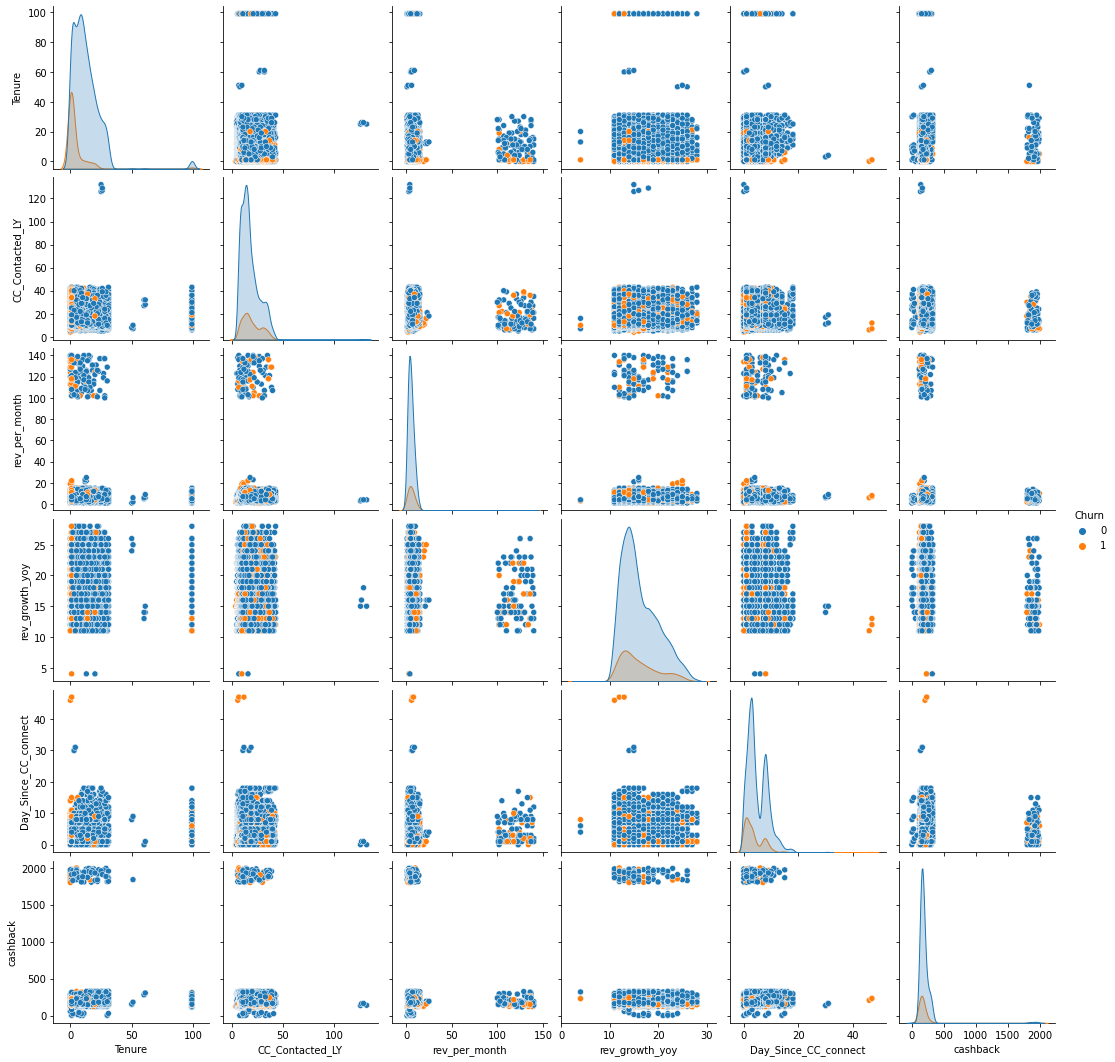

In [ ]:
sns.pairplot(data[inte],hue='Churn')
plt.show()
inte.remove('Churn')

### Observation:

Day since cc connect have a pattern with the variables tenure, CC_contacted_LY, rev_per_month, rev_growth_yoy. Higher the days since cc connect and lower the tenure or CC_contacted_LY or rev_per_month or rev_growth_yoy then there is a churn block in the above plot which represents customer churn. 

#### Clustering pattern:
For the variable Day since cc connect and tenure, CC_contacted_LY, rev_per_month, rev_growth_yoy there is a clustering patter present in the above plot. Similarly in other variables also. Performing a clustering segmentation will be significant.

#### CC_Contacted_LY vs Tenure:
There are four clusters present in the plot. low tenure have two clusters one for low tenure and low CC_Contacted_LY which have most of the data present. second cluster is for low tenure and high CC_Contacted_LY which have few data points. Third cluster is low CC_Contacted_LY and average tenure. Fourth cluster is High tenure and low CC_Contacted_LY. Churning data points are present only in 1st and 4th clusters which have low CC_Contacted_LY rate.

#### rev_per_month vs Tenure:
This plot have 4 cluster groups. 
Low tenure and Low rev_per_month: There is a cluster group for low tenure and low tenure and High rev_per_month: when there is Low tenure and high rev_per_month there is another cluster group with almost equal datapoints as the first group
average tenure and low rev_per_month: Have few datapoints but no churning points.
High tenure and low rev_per_month: Have few datapoints but no churning

observation: only low tenure clusters have high churning.

#### rev_growth_yoy vs Tenure:
This plot have five clusters
Low tenure and low rev_growth_yoy: having one data point and it is also churning.
Low tenure and average to high rev_growth_yoy: This cluster have most of the data points.
Average tenure and average rev_growth_yoy: have few datapoints but not churning
Average tenure and Highe rev_growth_yoy: have few datapoints but not churning
High tenure and average to high rev_growth_yoy: Have average data points but the churning happens only when the rev_growth_yoy is average and not high.

observation: when tenure is low or high churning happens.

#### Day_Since_CC_connect vs Tenure:
This plot have 5 clusters
low tenure and low Day_Since_CC_connect: which have most of the data present.
low tenure and average Day_Since_CC_connect: which have few datapoints but no churning observed.
low tenure and high Day_Since_CC_connect: which have few datapoints but all have churned.

average tenure and low Day_Since_CC_connect: which have few datapoints but no churning.
high tenure and low Day_Since_CC_connect: which have average datapoints but there are few points churning.

observation: Lower the tenure and higher Day_Since_CC_connect definite churning and lower the churning and average Day_Since_CC_connect also have more churning.


#### cashback vs Tenure:
This plot have 3 clusters.
Low tenure and low cashback: which have average and well spread data points. churning is present when tenure is low.
HIgh tenure and low cashback: which have few datapoints with no churning.
Low tenure and high cashback: which have most of the datapoints and there are churning present but few compared to the number of datapoints.

#### CC_Contacted_LY vs rev_per_month:
This plot have 3 clusters.
low rev_per_month and low CC_Contacted_LY: which have average datapoints and there is also churning data points present.

low CC_Contacted_LY and high rev_per_month: which have an average amout of data and there is also churning data points present. The data points are also well spread.

low rev_per_month and high CC_Contacted_LY: which have few datapoints but no churning points. 

Observation: The effors needed to maintain the 3rd cluster can be removed as they produce only low revenure.

#### CC_Contacted_LY vs rev_growth_yoy:
This plot have 3 cluster group
low rev_growth_yoy and low CC_Contacted_LY: which have few data points and churning also present.
low CC_Contacted_LY and average to high rev_growth_yoy: most of the datapoints are present in this cluster and there are also churning points.
high CC_Contacted_LY and average rev_growth_yoy: there are few data points but not churning points.

#### CC_Contacted_LY vs Day_Since_CC_connect:
This plot have 4 clusters.
low Day_Since_CC_connect and low CC_Contacted_LY: which contains most of the datapoints and churning also present.
low CC_Contacted_LY and average Day_Since_CC_connect: which contains few datapoints but no churning.
low CC_Contacted_LY and high Day_Since_CC_connect: which contains few datapoints but all churning.
High CC_Contacted_LY and low Day_Since_CC_connect: which contains few datapoints but no churning.

observation: low CC_Contacted_LY and high Day_Since_CC_connect datapoints have more churning rate, this should be treated.

#### CC_Contacted_LY vs cashback:
This plot has 2 clusters.
low CC_Contacted_LY and low cashback: which have average datapoints and churning is also present.
low CC_Contacted_LY and high cashback: which have average datapoints and also have churning.

observation: there are customers who contact less the customer care and use cashback less and there are customers who contact the customer care less and also use the cashback more.

#### rev_growth_yoy vs rev_per_month:
This plot have 3 cluster.
low rev_per_month and low rev_growth_yoy: which have only one data point and its not churning.
low rev_growth_yoy and average to high rev_per_month: which have more datapoints and churning is also present.
high rev_per_month and high rev_growth_yoy: which have average datapoints and churning also present.

observation: high rev_per_month and high rev_growth_yoy datapoints are more spread indicating higher standard deviation and unstablility

#### Day_Since_CC_connect vs rev_per_month:
This plot have 4 clusters.
low Day_Since_CC_connect and low rev_per_month: which have average datapoints and churning also present.
low rev_per_month and average Day_Since_CC_connect: which have few datapoints but not churning.
low rev_per_month and high Day_Since_CC_connect: which have few datapoints and all churning.
low Day_Since_CC_connect and high rev_per_month: which have a good number of datapoints and churning also present. the data is well spread.

observation: Efforts spent on low rev_per_month and high Day_Since_CC_connect can be avoided as the revenue generated is not fair.

#### cashback vs rev_per_month:
This plot have 3 cluster.
low cashback and low rev_per_month: which have few datapoints and some are churning.
low cashback and high rev_per_month: which have one datapoints and not churning.
High cashback and low rev_per_month: which have few datapoints and some are churning. This cluster can be improved.

#### Day_Since_CC_connect vs rev_growth_yoy:
This plot have 4 clusters.
low Day_Since_CC_connect and low rev_growth_yoy: which have few datapoints with churning.
average Day_Since_CC_connect and average rev_growth_yoy: which have few datapoint with no churning.
low Day_Since_CC_connect and high rev_growth_yoy: which have most of the datapoints and churning rate.
average rev_growth_yoy and high Day_Since_CC_connect: which have few datapoints and all are churning.

#### cashback vs rev_growth_yoy:
This plot have 2 clusters.
low cashback and average to high rev_growth_yoy: which have average datapoints and churning present.
high cashback and average to high rev_growth_yoy: which have average datapoints and churning present.

#### cashback vs Day_Since_CC_connect:
This plot have 2 cluster.
low cashback and low Day_Since_CC_connec: which have average datapoints and churning rate.
High cashback and low Day_Since_CC_connect: which have average datapoints and churning rate.


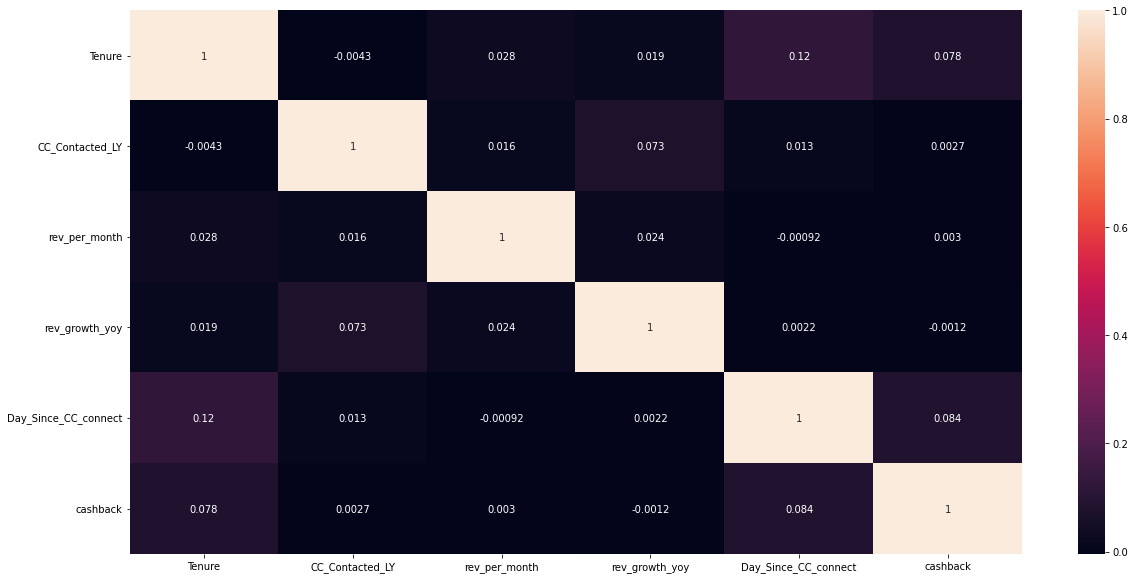

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data[inte].corr(),annot=True)
plt.show()

### Observation:
From the above heatmap we can observe that there is low correlation between the variables in the dataset for continous variables.

#### Negative Correlations:
1. There is a negative correlation between the variables CC_Contacted_LY and Tenure.
2. There is a negative correlation between the variables cashback and rev_growth_yoy.

#### Positive Correlations:
Except the above mentioned pairs all the other variables have very low to low positive correlation. The highest positive correlation is for Tenure and Day_Since_CC_connect, the second highest is for CC_Contacted_LY and rev_growth_yoy. The lowest positive correlation is for CC_Contacted_LY and Day_Since_CC_connect.

## Removal of unwanted variables (if applicable):
The AccountID variable can be removed as it doesnt add any value

In [ ]:
data=data.drop(['AccountID'],axis=1)

## Missing Value treatment (if applicable)

In [ ]:
data.isnull().sum()

Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
Churn                        0
dtype: int64

In [ ]:
len(data)

11260

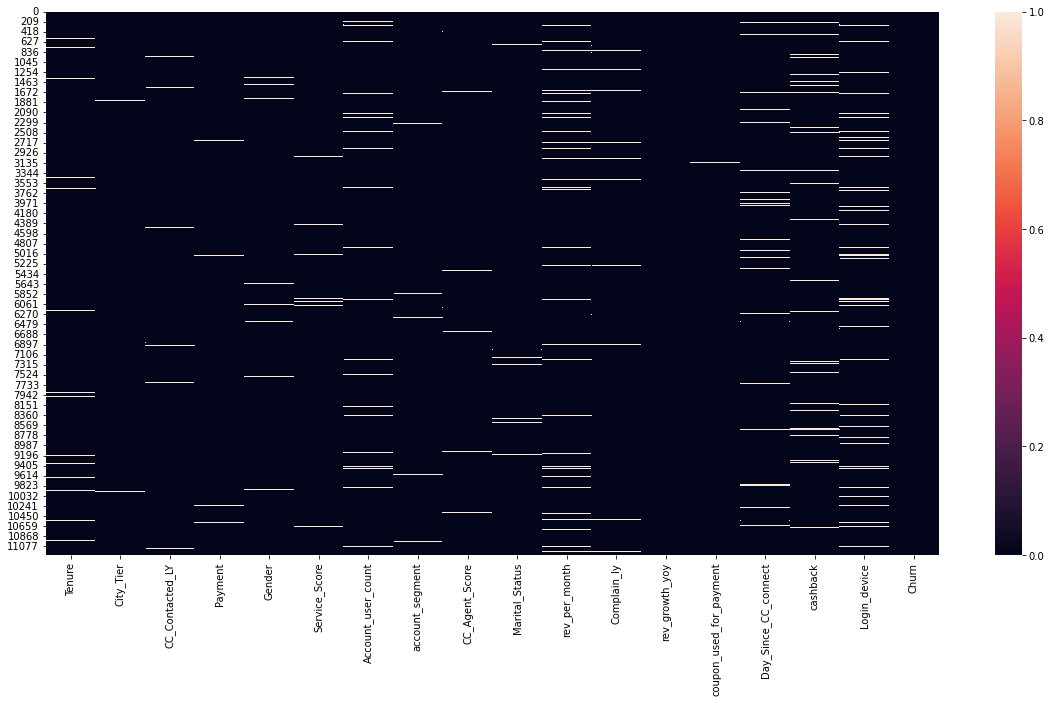

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull())
plt.show()

In [ ]:
(data.isnull().sum()/len(data))*100

Tenure                     1.936057
City_Tier                  0.994671
CC_Contacted_LY            0.905861
Payment                    0.968028
Gender                     0.959147
Service_Score              0.870337
Account_user_count         3.943162
account_segment            0.861456
CC_Agent_Score             1.030195
Marital_Status             1.882771
rev_per_month              7.024867
Complain_ly                3.170515
rev_growth_yoy             0.026643
coupon_used_for_payment    0.026643
Day_Since_CC_connect       3.179396
cashback                   4.200710
Login_device               6.749556
Churn                      0.000000
dtype: float64

#### Observation:
There are high amount of missing values in the dataset. we are imputing the dataset with mean median and mode values for variable with less than 5% of null values and for the variables Login_Device and Rev_per_month we are dropping the null values

### Missing Value Treatment

In [ ]:
data_with_null=data.copy()
data=data.dropna(subset=['rev_per_month','Login_device'])

In [ ]:
data.isnull().sum()

Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                      0
Gender                     108
Service_Score                0
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   472
Login_device                 0
Churn                        0
dtype: int64

In [ ]:
data.shape

(10041, 18)

### Observation: 
For the remaining variables we are going to impute using mean median and mode.

In [ ]:
for i in data.columns:
  if data[i].dtype=='object':
    data[i]=data[i].fillna(data[i].mode()[0])
  else:
    s=data[i].skew()
    if (s<0.5) or (s>-0.5):
      data[i]=data[i].fillna(data[i].mean())
    else:
      data[i]=data[i].fillna(data[i].median())

In [ ]:
data.isnull().sum()

Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
Churn                      0
dtype: int64

### Outlier Treatment and Variable transformation (if applicable)

In [ ]:
data_out=data.copy()

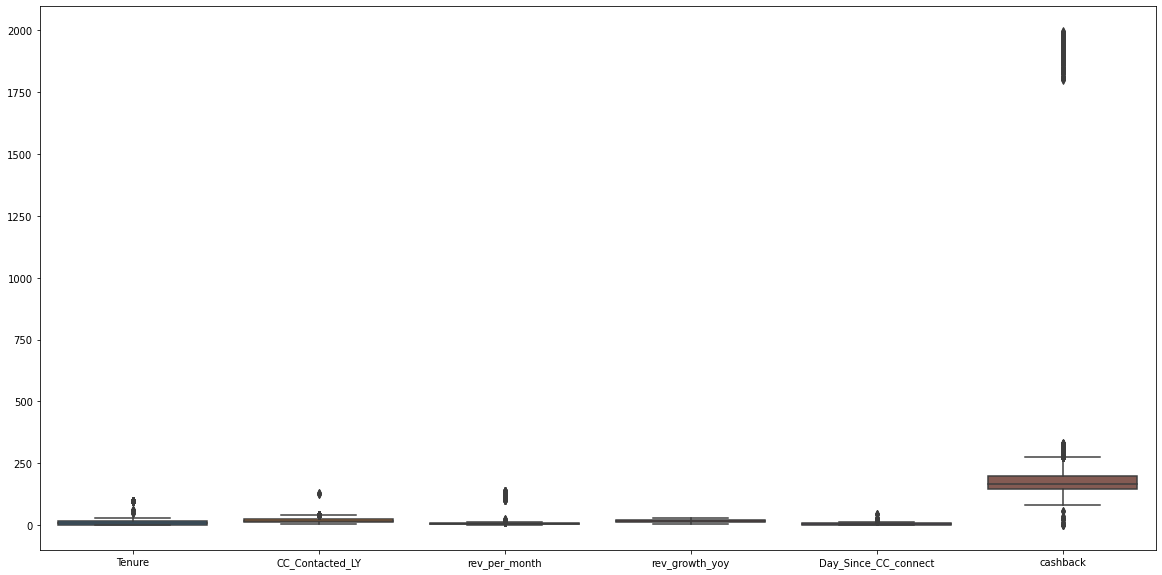

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data_out[inte])
plt.show()

In [ ]:
for i in inte:
    print(i)
    q1=data_out[i].quantile(0.25)
    q3=data_out[i].quantile(0.75)
    iqr=q3-q1
    ul=q3+(1.5*iqr)
    ll=q1-(1.5*iqr)
    print(((len(data_out[data_out[i]>ul])+len(data_out[data_out[i]<ll]))/len(data_out[i]))*100)

Tenure
1.3743651030773827
CC_Contacted_LY
0.3983666965441689
rev_per_month
1.8026093018623643
rev_growth_yoy
0.0
Day_Since_CC_connect
1.1652225873916942
cashback
8.525047306045215


In [ ]:
def outlier_per(col):
    values=col
    q1=np.quantile(values,0.25)
    q3=np.quantile(values,0.75)
    iqr=q3-q1
    ul=q3+(1.5*iqr)
    ll=q1-(1.5*iqr)
    per=((len(values[values>ul])+len(values[values<ll]))/len(values))*100
    return(per)

for i in data_out[inte]:
  print(i+' Original outlier percentage')
  percentage=outlier_per(data_out[i])
  print(str(round(percentage,2))+' %')

  print(i+' Log Transform')
  data_out[i]=data_out[i].apply(lambda x: np.log(x))
  percentage=outlier_per(data_out[i])
  print(str(round(percentage,2))+' %')

  print(i+' square Transform')
  data_out[i]=data_out[i].apply(lambda x: np.square(x))
  percentage=outlier_per(data_out[i])
  print(str(round(percentage,2))+' %')

  print(i+' square root Transform')
  data_out[i]=data_out[i].apply(lambda x: np.sqrt(x))
  percentage=outlier_per(data_out[i])
  print(str(round(percentage,2))+' %')


  print(i+' Exponential Transform')
  data_out[i]=data_out[i].apply(lambda x: np.exp(x))
  percentage=outlier_per(data_out[i])
  print(str(round(percentage,2))+' %')

  print(i+' Cube Transform')
  data_out[i]=data_out[i].apply(lambda x: x**3)
  percentage=outlier_per(data_out[i])
  print(str(round(percentage,2))+' %')

  print(i+' Cuberoot Transform')
  data_out[i]=data_out[i].apply(lambda x: x**(1/3))
  percentage=outlier_per(data_out[i])
  print(str(round(percentage,2))+' %')

  print(i+' Logplus Transform')
  data_out[i]=data_out[i].apply(lambda x: np.log1p(x))
  percentage=outlier_per(data_out[i])
  print(str(round(percentage,2))+' %')
  print('\n')

Tenure Original outlier percentage
1.37 %
Tenure Log Transform
11.08 %
Tenure square Transform
12.39 %
Tenure square root Transform
11.08 %
Tenure Exponential Transform
12.46 %
Tenure Cube Transform
15.48 %
Tenure Cuberoot Transform
12.46 %
Tenure Logplus Transform
11.08 %


CC_Contacted_LY Original outlier percentage
0.4 %
CC_Contacted_LY Log Transform
0.04 %
CC_Contacted_LY square Transform
0.04 %
CC_Contacted_LY square root Transform
0.04 %
CC_Contacted_LY Exponential Transform
0.65 %
CC_Contacted_LY Cube Transform
12.0 %
CC_Contacted_LY Cuberoot Transform
0.65 %
CC_Contacted_LY Logplus Transform
0.04 %


rev_per_month Original outlier percentage
1.8 %
rev_per_month Log Transform
1.06 %
rev_per_month square Transform
1.12 %
rev_per_month square root Transform
1.06 %
rev_per_month Exponential Transform
2.69 %
rev_per_month Cube Transform
10.84 %
rev_per_month Cuberoot Transform
2.69 %
rev_per_month Logplus Transform
1.09 %


rev_growth_yoy Original outlier percentage
0.0 %
rev_growth

#### Observation:
There are outliers present in few variables, performing a log or square root transformation reduces the outlier percentage. Instead of capping we can got with transformation as outlier treatment.

For few variables after transformation the outliers are increased so we are only transforming the variables with logplus for which the outlier percentage reduces.

In [ ]:
for i in ['CC_Contacted_LY','rev_per_month','cashback']:
  data[i]=data[i].apply(lambda x: np.log1p(x))

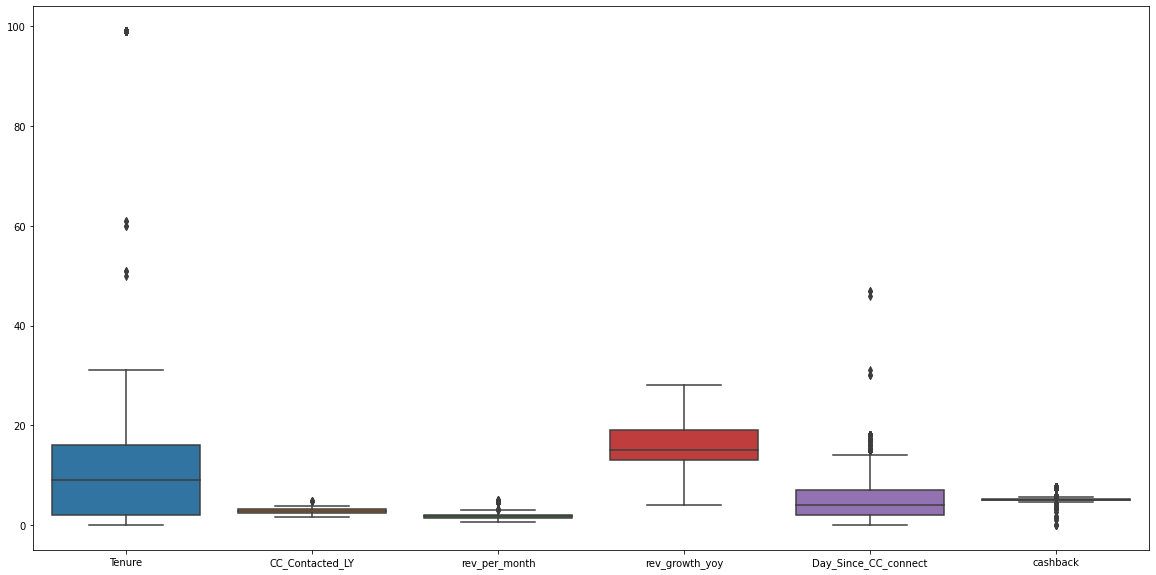

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data[inte])
plt.show()

### Encoding the data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
attributes(data)

Tenure
Continous


Unique
[ 4.          0.          2.         13.         11.         11.12032984
  9.         99.         20.         14.          8.         26.
 18.          5.         30.          7.          1.         23.
  3.         29.          6.         28.         24.         16.
 10.         15.         22.         27.         25.         12.
 19.         21.         17.         50.         60.         31.
 51.         61.        ]
Mean
11.120329838134952
Median
9.0
Mode
1.0


City_Tier
Continous


Unique
[3. 1. 2.]
Mean
1.6494373070411315
Median
1.0
Mode
1.0


CC_Contacted_LY
Continous


Unique
[1.94591015 2.19722458 3.4339872  2.77258872 2.56494936 3.13549422
 2.48490665 2.30258509 3.4657359  2.94443898 2.63905733 3.40119738
 3.36729583 3.29583687 2.7080502  2.39789527 3.25809654 3.33220451
 2.89037176 3.04452244 3.17805383 3.52636052 2.99573227 3.58351894
 3.21887582 2.83321334 3.49650756 3.09104245 2.93784562 3.55534806
 1.79175947 1.60943791 4.84418709 2.07944154 3.6

In [ ]:
labelcols=['Payment','Gender','account_segment','Marital_Status','Login_device']
for i in data.columns:
  # data[i]=data[i].astype('category')
  # data[i]=data[i].cat.codes
  if i=='Gender':
    data[i]=np.where(data[i]=='Male','1','0')
  elif i=='Marital_Status':
    data[i]=data[i].replace({'Single':'1','Married':'2','Divorced':'3'})
  elif i=='Login_device':
    data[i]=data[i].replace({'Mobile':'1','Computer':'2'})
  elif i=='Payment':
    data[i]=data[i].replace({'Debit Card':'1','Credit Card':'2','UPI':'3','E wallet':'4','Cash on Delivery':'5'})
  elif i=='account_segment':
    data[i]=data[i].replace({'Super':'1','Super Plus':'2','Regular':'3','Regular Plus':'4','HNI':'5'})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10041 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   10041 non-null  float64
 1   City_Tier                10041 non-null  float64
 2   CC_Contacted_LY          10041 non-null  float64
 3   Payment                  10041 non-null  object 
 4   Gender                   10041 non-null  object 
 5   Service_Score            10041 non-null  float64
 6   Account_user_count       10041 non-null  float64
 7   account_segment          10041 non-null  object 
 8   CC_Agent_Score           10041 non-null  float64
 9   Marital_Status           10041 non-null  object 
 10  rev_per_month            10041 non-null  float64
 11  Complain_ly              10041 non-null  float64
 12  rev_growth_yoy           10041 non-null  float64
 13  coupon_used_for_payment  10041 non-null  float64
 14  Day_Since_CC_connect  

### Observation:
Performing personalized encoding to interpret the values later

In [ ]:
data.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Churn
0,4.0,3.0,1.945910,1,0,3.0,3.0,1,2.0,1,2.302585,1.0,11.0,1.0,5.0,5.080969,1,1
1,0.0,1.0,2.197225,3,1,3.0,4.0,4,3.0,1,2.079442,1.0,15.0,0.0,0.0,4.803201,1,1
2,0.0,1.0,3.433987,1,1,2.0,4.0,4,3.0,1,1.945910,1.0,14.0,0.0,3.0,5.296074,1,1
3,0.0,3.0,2.772589,1,1,2.0,4.0,1,5.0,1,2.197225,0.0,23.0,0.0,3.0,4.905793,1,1
4,0.0,1.0,2.564949,2,1,2.0,3.0,4,5.0,1,1.386294,0.0,11.0,1.0,3.0,4.872139,1,1


In [ ]:
data.shape

(10041, 18)

### Addition of new variables (if required)

Adding new variables is not required as of now. maybe in further analysis if required we will add new variables

### Business insights from EDA 

##### a) Is the data unbalanced? If so, what can be done? Please explain in the context of the business

In [ ]:
data.Churn.value_counts(normalize=True)

0    0.831192
1    0.168808
Name: Churn, dtype: float64

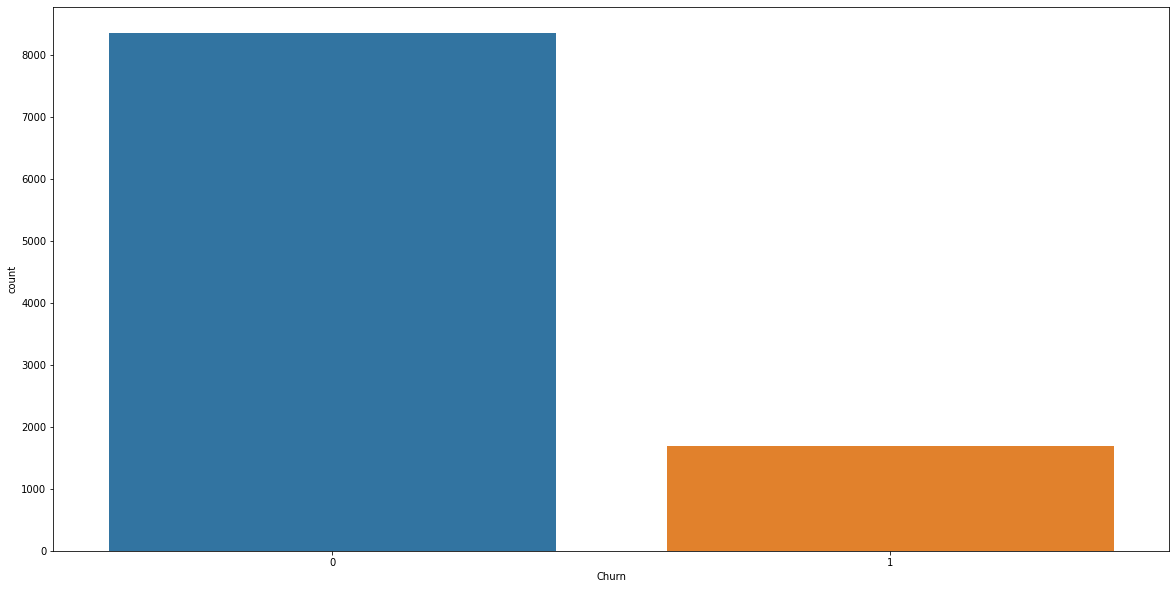

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x=data.Churn)

#### Observation: 
From the plot we can observe that the Churn variable is not balance and it requires balancing the dataset before Training the model

83% of not churning customers are there and 16% of churning customers are there. if we continue with this data, the model we train would have learned with 83% of customers who have not churned and 16% of customers who have churned. Its predictive power of churning customer will only be 16%.

Due to this Balancing the data before training a model is crusial.

### Any business insights using clustering  (if applicable)
We are going to using K-Means clustering in the data to perform segmentation and find insights about the segmentation

In [ ]:
data.shape

(10041, 18)

In [ ]:
data_s=data.copy()

In [ ]:
data_s.shape

(10041, 18)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
data_sx=data_s.drop(cat,axis=1)
data_sy=data_s[cat]
scaled=pd.DataFrame(s.fit_transform(data_sx),columns=data_sx.columns)

In [ ]:
scaled.head()

,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,Day_Since_CC_connect,cashback
0,-0.540665,-1.966928,0.977768,-1.386082,0.101609,-0.291786
1,-0.844396,-1.411341,0.586819,-0.320057,-1.277146,-1.038589
2,-0.844396,1.322801,0.352871,-0.586563,-0.449893,0.286540
3,-0.844396,-0.139369,0.793175,1.811992,-0.449893,-0.762762
4,-0.844396,-0.598403,-0.627580,-1.386082,-0.449893,-0.853243


In [ ]:
scaled.shape

(10041, 6)

In [ ]:
wss=[]
for i in range(1,31):
  km=KMeans(n_clusters=i,random_state=1)
  km.fit(scaled)
  km.labels_
  wss.append(km.inertia_)

wss

[60246.0,
 51922.73931031596,
 46156.97276349331,
 40795.699681027654,
 36591.31589626673,
 32770.611427859614,
 29951.57295514662,
 27775.444265698297,
 26335.463107567117,
 25090.681966660562,
 23973.267462964846,
 22988.366557039706,
 21956.462646184715,
 21071.393847177824,
 20257.834757006807,
 19633.197338099235,
 19063.03412311168,
 18610.310439350385,
 18177.477061064466,
 17732.80978667849,
 17383.86780792233,
 17052.726253255318,
 16767.124114478138,
 16438.683933052016,
 16154.64045602143,
 15901.62781380206,
 15680.141859346117,
 15473.612912032719,
 15224.383961137848,
 15056.317418187027]

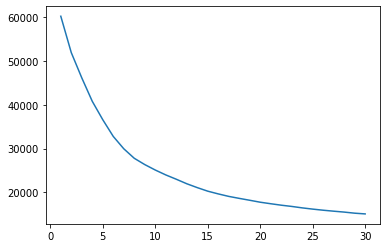

In [ ]:
plt.plot(range(1,31),wss)

### Observation:

we can find the elbow cut in 5-10 range. we will get the sihouette score for selecting the optimum cluster

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
sil=[]
for i in range(5,11):
  km=KMeans(n_clusters=i,random_state=1)
  km.fit(scaled)
  label=km.labels_
  # print(silhouette_score(scaled,label))
  sil.append(silhouette_score(scaled,label))
sil

[0.16623428302724555,
 0.17924544765848485,
 0.17787717780328777,
 0.17893919900468125,
 0.17734476786928388,
 0.16849641410453395]

In [ ]:
sil.sort()
sil

[0.16623428302724555,
 0.16849641410453395,
 0.17734476786928388,
 0.17787717780328777,
 0.17893919900468125,
 0.17924544765848485]

### Observation: Optimum cluster is grouping of 6

In [ ]:
km=KMeans(n_clusters=6)
km.fit(scaled)
label=km.labels_

In [ ]:
scaled_array=scaled.to_numpy()

### Unscaling the data

In [ ]:
data_sx.shape

(10041, 6)

In [ ]:
data_sy.shape

(10041, 12)

In [ ]:
uns=s.inverse_transform(scaled_array)
data_sx=pd.DataFrame(data=uns,columns=data_sx.columns)

In [ ]:
data_sx.shape

(10041, 6)

In [ ]:
data_sy.shape

(10041, 12)

In [ ]:
cols=pd.concat([data_sx,data_sy],axis=1)
data_new=pd.DataFrame(np.hstack([data_sx,data_sy]))

In [ ]:
data_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,4,1.94591,2.30259,11,5,5.08097,3,1,0,3,3,1,2,1,1,1,1,1
1,0,2.19722,2.07944,15,0,4.8032,1,3,1,3,4,4,3,1,1,0,1,1
2,0,3.43399,1.94591,14,3,5.29607,1,1,1,2,4,4,3,1,1,0,1,1
3,0,2.77259,2.19722,23,3,4.90579,3,1,1,2,4,1,5,1,0,0,1,1
4,0,2.56495,1.38629,11,3,4.87214,1,2,1,2,3,4,5,1,0,1,1,1


In [ ]:
data_new.columns=cols.columns
data_new.head()

,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,Day_Since_CC_connect,cashback,City_Tier,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,Complain_ly,coupon_used_for_payment,Login_device,Churn
0,4,1.94591,2.30259,11,5,5.08097,3,1,0,3,3,1,2,1,1,1,1,1
1,0,2.19722,2.07944,15,0,4.8032,1,3,1,3,4,4,3,1,1,0,1,1
2,0,3.43399,1.94591,14,3,5.29607,1,1,1,2,4,4,3,1,1,0,1,1
3,0,2.77259,2.19722,23,3,4.90579,3,1,1,2,4,1,5,1,0,0,1,1
4,0,2.56495,1.38629,11,3,4.87214,1,2,1,2,3,4,5,1,0,1,1,1


In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10041 entries, 0 to 10040
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Tenure                   10041 non-null  object
 1   CC_Contacted_LY          10041 non-null  object
 2   rev_per_month            10041 non-null  object
 3   rev_growth_yoy           10041 non-null  object
 4   Day_Since_CC_connect     10041 non-null  object
 5   cashback                 10041 non-null  object
 6   City_Tier                10041 non-null  object
 7   Payment                  10041 non-null  object
 8   Gender                   10041 non-null  object
 9   Service_Score            10041 non-null  object
 10  Account_user_count       10041 non-null  object
 11  account_segment          10041 non-null  object
 12  CC_Agent_Score           10041 non-null  object
 13  Marital_Status           10041 non-null  object
 14  Complain_ly              10041 non-nul

In [ ]:
objectlist=['Payment','Gender','account_segment','Marital_Status','Login_device']
for i in data_new.columns:
  data_new[i]=data_new[i].astype(float)
for i in objectlist:
  data_new[i]=data_new[i].astype(object)

In [ ]:
len(label)

10041

In [ ]:
data_new['KNN_2']=label

In [ ]:
data_new.head()

,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,Day_Since_CC_connect,cashback,City_Tier,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,Complain_ly,coupon_used_for_payment,Login_device,Churn,KNN_2
0,4.0,1.945910,2.302585,11.0,5.0,5.080969,3.0,1,0,3.0,3.0,1,2.0,1,1.0,1.0,1,1.0,0
1,0.0,2.197225,2.079442,15.0,0.0,4.803201,1.0,3,1,3.0,4.0,4,3.0,1,1.0,0.0,1,1.0,0
2,0.0,3.433987,1.945910,14.0,3.0,5.296074,1.0,1,1,2.0,4.0,4,3.0,1,1.0,0.0,1,1.0,1
3,0.0,2.772589,2.197225,23.0,3.0,4.905793,3.0,1,1,2.0,4.0,1,5.0,1,0.0,0.0,1,1.0,2
4,0.0,2.564949,1.386294,11.0,3.0,4.872139,1.0,2,1,2.0,3.0,4,5.0,1,0.0,1.0,1,1.0,0


In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10041 entries, 0 to 10040
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   10041 non-null  float64
 1   CC_Contacted_LY          10041 non-null  float64
 2   rev_per_month            10041 non-null  float64
 3   rev_growth_yoy           10041 non-null  float64
 4   Day_Since_CC_connect     10041 non-null  float64
 5   cashback                 10041 non-null  float64
 6   City_Tier                10041 non-null  float64
 7   Payment                  10041 non-null  object 
 8   Gender                   10041 non-null  object 
 9   Service_Score            10041 non-null  float64
 10  Account_user_count       10041 non-null  float64
 11  account_segment          10041 non-null  object 
 12  CC_Agent_Score           10041 non-null  float64
 13  Marital_Status           10041 non-null  object 
 14  Complain_ly           

### Keeping only the continous variables for better profiling based on mean

In [ ]:
inte.remove('cashback')
inte.append('KNN_2')
inte.append('Churn')

In [ ]:
data_clus=data_new[inte].groupby(['KNN_2','Churn']).mean()
data_clus.reset_index(inplace=True)
data_clus

,KNN_2,Churn,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,Day_Since_CC_connect
0,0,0.0,8.407986,2.467613,1.449526,14.309362,3.009598
1,0,1.0,2.143563,2.512153,1.524463,13.872255,2.529990
2,1,0.0,12.232196,3.163588,2.082584,15.122352,2.869940
3,1,1.0,3.274541,3.190653,2.107761,15.069204,2.160715
4,2,0.0,10.966969,2.816853,1.731904,21.792529,4.655079
5,2,1.0,2.203201,2.994068,1.685984,22.062678,3.610733
6,3,0.0,13.845819,2.857676,1.689904,14.727829,9.403133
7,3,1.0,7.734440,2.927644,1.739466,14.219178,9.226628
8,4,0.0,97.612613,2.888511,1.729447,16.810811,4.639640
9,4,1.0,99.000000,2.717838,1.637676,14.791667,3.750000


In [ ]:
ch_count=data_new.groupby('KNN_2')['Churn'].value_counts()
ch_count_percentage=data_new.groupby('KNN_2')['Churn'].value_counts(normalize=True)
c=pd.concat([ch_count,ch_count_percentage],axis=1)
c.columns=['Churn_count','Churn_percentage']
c.reset_index(inplace=True)
# c.rename(columns={'Churn':'Churn_class'},inplace=True)
c

,KNN_2,Churn,Churn_count,Churn_percentage
0,0,0.0,2286,0.820237
1,0,1.0,501,0.179763
2,1,0.0,2161,0.788974
3,1,1.0,578,0.211026
4,2,0.0,1740,0.832138
5,2,1.0,351,0.167862
6,3,0.0,1962,0.899587
7,3,1.0,219,0.100413
8,4,0.0,111,0.822222
9,4,1.0,24,0.177778


In [ ]:
data_clus_new=data_clus.merge(c,on=['KNN_2','Churn'])
data_clus_new

,KNN_2,Churn,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,Day_Since_CC_connect,Churn_count,Churn_percentage
0,0,0.0,8.407986,2.467613,1.449526,14.309362,3.009598,2286,0.820237
1,0,1.0,2.143563,2.512153,1.524463,13.872255,2.529990,501,0.179763
2,1,0.0,12.232196,3.163588,2.082584,15.122352,2.869940,2161,0.788974
3,1,1.0,3.274541,3.190653,2.107761,15.069204,2.160715,578,0.211026
4,2,0.0,10.966969,2.816853,1.731904,21.792529,4.655079,1740,0.832138
5,2,1.0,2.203201,2.994068,1.685984,22.062678,3.610733,351,0.167862
6,3,0.0,13.845819,2.857676,1.689904,14.727829,9.403133,1962,0.899587
7,3,1.0,7.734440,2.927644,1.739466,14.219178,9.226628,219,0.100413
8,4,0.0,97.612613,2.888511,1.729447,16.810811,4.639640,111,0.822222
9,4,1.0,99.000000,2.717838,1.637676,14.791667,3.750000,24,0.177778


In [ ]:
data_clus_new[data_clus_new.KNN_2==0]

,KNN_2,Churn,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,Day_Since_CC_connect,Churn_count,Churn_percentage
0,0,0.0,8.407986,2.467613,1.449526,14.309362,3.009598,2286,0.820237
1,0,1.0,2.143563,2.512153,1.524463,13.872255,2.529990,501,0.179763


#### Observation for 1st cluster:
Churn: Churned customers are 89% and not churned cusomers are 10%

Tenure: The average Tenure for non churn customers are 13.86 and churn customers are 7.6, churning customers are having less tenure.

CC_Contacted_LY: Yearly average of a customer contacting the customer care for non churning customer is 1.68 and churning customer is 1.73 which indicates churning customers are contacting customer care more.

Rev_per_month: Average Revenue earned per month. For churning customers its 3.96 and for non churning customer its 3.73. Customers who are churning may have invested more and due to poor quality or unsatisfied services they are churning more.

Rev_growth_yoy: revenue growth percentage of the account (last 12 months vs last 24 to 13 month). For churning customers the value is 3.23 and for non churning customers its 3.10 which proves the point from above variable. Churning customers are expecting quality services.

Day_since_CC_connect: Number of days since no customers in the account has contacted the customer care. For churning customers the value is 0.46 and non churning customers the value is 0.23 which shows that when a customer contacts the customer care his churning is reducing.

## Conclusion: Less churning cluster



In [ ]:
data_clus_new[data_clus_new.KNN_2==1]

,KNN_2,Churn,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,Day_Since_CC_connect,Churn_count,Churn_percentage
2,1,0.0,12.232196,3.163588,2.082584,15.122352,2.869940,2161,0.788974
3,1,1.0,3.274541,3.190653,2.107761,15.069204,2.160715,578,0.211026


### Observation for 2nd cluster:
Churn: Churned customers are 81% and not churned cusomers are 18%

Tenure: The average Tenure for non churn customers are 8.3 and churn customers are 2, churning customers are having less tenure.

CC_Contacted_LY: Yearly average of a customer contacting the customer care for non churning customer is 1.44 and churning customer is 1.52 which indicates churning customers are contacting customer care more.

Rev_per_month: Average Revenue earned per month. For churning customers its 3.7 and for non churning customer its 3.54. Customers who are churning may have invested more and due to poor quality or unsatisfied services they are churning more.

Rev_growth_yoy: revenue growth percentage of the account (last 12 months vs last 24 to 13 month). For churning customers the value is 3.28 and for non churning customers its 2.99. 

Day_since_CC_connect: Number of days since no customers in the account has contacted the customer care. For churning customers the value is 0.53 and non churning customers the value is 0.24 which shows that more a customer is not satisfied, more he contacts the customer care, and more they churn.

##Conclusion: Low Tenure Cluster


In [ ]:
data_clus_new[data_clus_new.KNN_2==2]

,KNN_2,Churn,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,Day_Since_CC_connect,Churn_count,Churn_percentage
4,2,0.0,10.966969,2.816853,1.731904,21.792529,4.655079,1740,0.832138
5,2,1.0,2.203201,2.994068,1.685984,22.062678,3.610733,351,0.167862


### Observation for 3rd cluster:
Churn: Churned customers are 82% and not churned cusomers are 17%

Tenure: The average Tenure for non churn customers are 10.8 and churn customers are 2.17, churning customers are having less tenure.

CC_Contacted_LY: Yearly average of a customer contacting the customer care for non churning customer is 1.72 and churning customer is 1.68. Rate of customers contacting customer care is less for churning customers, if it is possible to contact the customer often to get their queries non churning rate can be improved.

Rev_per_month: Average Revenue earned per month. For churning customers its 3.98 and for non churning customer its 3.72. Customers who are churning may have invested more and due to poor quality or unsatisfied services they are churning more.

Rev_growth_yoy: revenue growth percentage of the account (last 12 months vs last 24 to 13 month). For churning customers the value is 3.61 and for non churning customers its 2.85. 

Day_since_CC_connect: Number of days since no customers in the account has contacted the customer care. For churning customers the value is 0.62 and non churning customers the value is 0.21 which shows that more a customer is not satisfied, more he contacts the customer care, and more they churn.

## Conclustion: Average Tenure with High Day_since_CC_connect for churning customers. we should check then for feedback to improve.

In [ ]:
data_clus_new[data_clus_new.KNN_2==3]

,KNN_2,Churn,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,Day_Since_CC_connect,Churn_count,Churn_percentage
6,3,0.0,13.845819,2.857676,1.689904,14.727829,9.403133,1962,0.899587
7,3,1.0,7.734440,2.927644,1.739466,14.219178,9.226628,219,0.100413


### Observation for 4th cluster:
Churn: Churned customers are 80% and not churned cusomers are 20%

Tenure: The average Tenure for non churn customers are 12.42 and churn customers are 3.39, churning customers are having less tenure.

CC_Contacted_LY: Yearly average of a customer contacting the customer care for non churning customer is 2.09 and churning customer is 2.13.

Rev_per_month: Average Revenue earned per month. For churning customers its 4 and for non churning customer its 3.62. Customers who are churning may have invested more and due to poor quality or unsatisfied services they are churning more.

Rev_growth_yoy: revenue growth percentage of the account (last 12 months vs last 24 to 13 month). For churning customers the value is 3.35 and for non churning customers its 3.01. 

Day_since_CC_connect: Number of days since no customers in the account has contacted the customer care. For churning customers the value is 0.52 and non churning customers the value is 0.22 which shows that more a customer is not satisfied, more he contacts the customer care, and more they churn.

## Conclustion: High Churning Cluster

In [ ]:
data_clus_new[data_clus_new.KNN_2==4]

,KNN_2,Churn,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,Day_Since_CC_connect,Churn_count,Churn_percentage
8,4,0.0,97.612613,2.888511,1.729447,16.810811,4.63964,111,0.822222
9,4,1.0,99.000000,2.717838,1.637676,14.791667,3.75000,24,0.177778


### Observation for 5th cluster:
Churn: Churned customers are 80% and not churned cusomers are 20%

Tenure: The average Tenure for non churn customers are 12.48 and churn customers are 1.72, churning customers are having less very less tenure.

CC_Contacted_LY: Yearly average of a customer contacting the customer care for non churning customer is 1.75 and churning customer is 1.64.

Rev_per_month: Average Revenue earned per month. For churning customers its 4.13 and for non churning customer its 3.59. Customers who are churning may have invested more and due to poor quality or unsatisfied services they are churning more.

Rev_growth_yoy: revenue growth percentage of the account (last 12 months vs last 24 to 13 month). For churning customers the value is 3 and for non churning customers its 2.84. 

Day_since_CC_connect: Number of days since no customers in the account has contacted the customer care. For churning customers the value is 0.54 and non churning customers the value is 0.26 which shows that more a customer is not satisfied, more he contacts the customer care, and more they churn.

## Conclustion: Lowest Tenure for Churning customers and High churning cluster

In [ ]:
data_clus_new[data_clus_new.KNN_2==5]

,KNN_2,Churn,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,Day_Since_CC_connect,Churn_count,Churn_percentage
10,5,0.0,12.488372,2.830704,1.756957,16.174419,4.639535,86,0.796296
11,5,1.0,1.727273,2.857132,1.645929,15.363636,3.000000,22,0.203704


### Observation for 6th cluster:
Churn: Churned customers are 82% and not churned cusomers are 18%

Tenure: The average Tenure for non churn customers are 97.6 and churn customers are 99, There was few outliers in the dataset even after treating, this is one of them.

CC_Contacted_LY: Yearly average of a customer contacting the customer care for non churning customer is 1.72 and churning customer is 1.63.

Rev_per_month: Average Revenue earned per month. For churning customers its 3.67 and for non churning customer its 4.16. Customers who are churning may have invested more and due to poor quality or unsatisfied services they are churning more.

Rev_growth_yoy: revenue growth percentage of the account (last 12 months vs last 24 to 13 month). For churning customers the value is 3.7 and for non churning customers its 2.7. 

Day_since_CC_connect: Number of days since no customers in the account has contacted the customer care. For churning customers the value is 0.41 and non churning customers the value is 0.26 which shows that more a customer is not satisfied, more he contacts the customer care, and more they churn.

## Conclustion: Tenure Outlier Cluster and Highest Rev_per_month for churning customers.

### Final dataset for further processing

In [ ]:
data_final=data_new.copy()
data_final.head()

,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,Day_Since_CC_connect,cashback,City_Tier,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,Complain_ly,coupon_used_for_payment,Login_device,Churn,KNN_2
0,4.0,1.945910,2.302585,11.0,5.0,5.080969,3.0,1,0,3.0,3.0,1,2.0,1,1.0,1.0,1,1.0,0
1,0.0,2.197225,2.079442,15.0,0.0,4.803201,1.0,3,1,3.0,4.0,4,3.0,1,1.0,0.0,1,1.0,0
2,0.0,3.433987,1.945910,14.0,3.0,5.296074,1.0,1,1,2.0,4.0,4,3.0,1,1.0,0.0,1,1.0,1
3,0.0,2.772589,2.197225,23.0,3.0,4.905793,3.0,1,1,2.0,4.0,1,5.0,1,0.0,0.0,1,1.0,2
4,0.0,2.564949,1.386294,11.0,3.0,4.872139,1.0,2,1,2.0,3.0,4,5.0,1,0.0,1.0,1,1.0,0


# **Project Notes 2**

In [ ]:
import scipy.stats as stat

### Normality test

### H0= The sample comes from a normal distribution.
### HA=The sample is not coming from a normal distribution.

In [ ]:
alpha=0.05
for i in data_final.columns:
  if i not in cat:
    print(i)
    a,b=stat.shapiro(data_final[[i]])
    print("Statistics",a,"P-value",b)
    if b<alpha:
      print("The Null Hypothesis can be rejected")
      print('\n')
    else:
      print("The Null Hypothesis can be accepted")
      print('\n')

Tenure
Statistics 0.6547989845275879 P-value 0.0
The Null Hypothesis can be rejected


CC_Contacted_LY
Statistics 0.9809149503707886 P-value 1.5064833690944817e-34
The Null Hypothesis can be rejected


rev_per_month
Statistics 0.8883050680160522 P-value 0.0
The Null Hypothesis can be rejected


rev_growth_yoy
Statistics 0.9306544065475464 P-value 0.0
The Null Hypothesis can be rejected


Day_Since_CC_connect
Statistics 0.9011067152023315 P-value 0.0
The Null Hypothesis can be rejected


cashback
Statistics 0.6908745765686035 P-value 0.0
The Null Hypothesis can be rejected


KNN_2
Statistics 0.8796841502189636 P-value 0.0
The Null Hypothesis can be rejected




### From the above shapiro normality test we can observe that none of the continous variables are normally distributed, hence we are going to perform Mann and Whitney test.

## Mann and Whitney test

### H0: There is no significant difference between two distributions.
### HA: There is a significant difference between two distributions.

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
alpha=0.05
for i in data_final.columns:
  if i not in cat:
    print(i)
    churn_zero=data_final[data_final['Churn']==0][i].values
    churn_one=data_final[data_final['Churn']==1][i].values
    stat,p_value=mannwhitneyu(churn_zero,churn_one)
    print(p_value)
    if p_value<alpha:
      print('Reject Null Hypothesis : There are significant difference between two samples')
    else:
      print('Accept Null Hypothesis : There are no significant difference between two samples')
    print('\n')

Tenure
0.0
Reject Null Hypothesis : There are significant difference between two samples


CC_Contacted_LY
5.330455678843236e-13
Reject Null Hypothesis : There are significant difference between two samples


rev_per_month
0.0008235226446218653
Reject Null Hypothesis : There are significant difference between two samples


rev_growth_yoy
0.006087011588878369
Reject Null Hypothesis : There are significant difference between two samples


Day_Since_CC_connect
1.0169162068138316e-59
Reject Null Hypothesis : There are significant difference between two samples


cashback
1.1618150404865121e-54
Reject Null Hypothesis : There are significant difference between two samples


KNN_2
1.1897916746076434e-12
Reject Null Hypothesis : There are significant difference between two samples




### Conclusion: After performing Mann-whitnew U test, we can conclude that all the independent categorical variables have some significant difference with the dependent variable

### Chi-Square test for categorical data

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
cat

['City_Tier',
 'Payment',
 'Gender',
 'Service_Score',
 'Account_user_count',
 'account_segment',
 'CC_Agent_Score',
 'Marital_Status',
 'Complain_ly',
 'coupon_used_for_payment',
 'Login_device',
 'Churn']

In [ ]:
for i in cat:
  print(i)
  if data_final[i].dtype!='object':
    data_final[i]=data_final[i].astype(object)

City_Tier
Payment
Gender
Service_Score
Account_user_count
account_segment
CC_Agent_Score
Marital_Status
Complain_ly
coupon_used_for_payment
Login_device
Churn


In [ ]:
newcat=cat.copy()
newcat.remove('Churn')

In [ ]:
l=[]
pv=[]
dof_=[]
freq=[]
alpha=0.05
null='H0: Churn Doesnot depends on '
alternate='H1: Churn depends on '
chi_columns=pd.Series(newcat)
for i in cat:
  if i!='Churn':
    print(i)
    print(null,i)
    print(alternate,i)
    chi=pd.crosstab(index=data_final[i],columns=data_final['Churn'])
    chi2,pval,dof,exp_freq=chi2_contingency(chi,correction=False)
    pval=round(pval,4)
    if pval<alpha:
      print('Answer: ',alternate,i)
    else:
      print('Answer: ',null,i)
    print('\n')
    l.append(chi2)
    pv.append(pval)
    dof_.append(dof)
    freq.append(exp_freq)
l=pd.Series(l)
pv=pd.Series(pv)
dof_=pd.Series(dof_)
freq=pd.Series(freq)
chi_result=pd.concat([chi_columns,l,pv,dof_,freq],axis=1)
chi_result.columns=['Features','Chi2val','pval','dof','exp_freq']

City_Tier
H0: Churn Doesnot depends on  City_Tier
H1: Churn depends on  City_Tier
Answer:  H1: Churn depends on  City_Tier


Payment
H0: Churn Doesnot depends on  Payment
H1: Churn depends on  Payment
Answer:  H1: Churn depends on  Payment


Gender
H0: Churn Doesnot depends on  Gender
H1: Churn depends on  Gender
Answer:  H1: Churn depends on  Gender


Service_Score
H0: Churn Doesnot depends on  Service_Score
H1: Churn depends on  Service_Score
Answer:  H1: Churn depends on  Service_Score


Account_user_count
H0: Churn Doesnot depends on  Account_user_count
H1: Churn depends on  Account_user_count
Answer:  H1: Churn depends on  Account_user_count


account_segment
H0: Churn Doesnot depends on  account_segment
H1: Churn depends on  account_segment
Answer:  H1: Churn depends on  account_segment


CC_Agent_Score
H0: Churn Doesnot depends on  CC_Agent_Score
H1: Churn depends on  CC_Agent_Score
Answer:  H1: Churn depends on  CC_Agent_Score


Marital_Status
H0: Churn Doesnot depends on  Mari

In [ ]:
chi_result

,Features,Chi2val,pval,dof,exp_freq
0,City_Tier,60.662225,0.0000,2,"[[5460.100985957574, 1108.899014042426], [351...."
1,Payment,92.672920,0.0000,4,"[[3437.810576635793, 698.1894233642067], [2621..."
2,Gender,12.042388,0.0005,1,"[[3277.3904989542875, 665.6095010457126], [506..."
3,Service_Score,16.271365,0.0061,5,"[[5.818344786375859, 1.181655213624141], [55.6..."
4,Account_user_count,139.529398,0.0000,5,"[[346.6071108455333, 70.39288915446669], [398...."
5,account_segment,499.626230,0.0000,4,"[[3008.9154466686587, 611.0845533313415], [613..."
6,CC_Agent_Score,119.140186,0.0000,4,"[[1723.0612488795937, 349.9387511204063], [867..."
7,Marital_Status,323.232947,0.0000,2,"[[2607.4496564087244, 529.5503435912758], [450..."
8,Complain_ly,651.340049,0.0000,1,"[[5965.465790259935, 1211.5342097400658], [238..."
9,coupon_used_for_payment,27.515625,0.0361,16,"[[1595.0576635793248, 323.94233642067525], [32..."


### conclusion: After performing the chi-square test, we can conclude that all the categorical variables have a significant difference with the dependent variables.

## Feature selection:


After performing Mann-Whitney U test and Chi-square test, we observe that all the variables are significant in predicting the dependent variable, hence we are keeping all the 19 variables

### Definitions which are called repeatedly

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV,cross_val_score
pd.set_option("display.max_columns", None)
# below function returns the classification report as a dataframe
def table_report(label,predictedlabel,modelname,train_test_set,auc_score,accuracyscore,bias_error,variance_error):
    datasetname=pd.DataFrame(metrics.classification_report(label,predictedlabel,output_dict=True)).T
    datasetname=datasetname.iloc[:2,:3]
    # datasetname.drop('f1-score',axis=1,inplace=True)
    datasetname['Model']=modelname
    datasetname['SET']=train_test_set
    datasetname['precision']=round(datasetname['precision'],4)
    datasetname['recall']=round(datasetname['recall'],4)
    datasetname['AUC']=round(auc_score,4)
    datasetname['Accuracy']=round(accuracyscore,4)
    datasetname['Bias Error']=round(bias_error,4)
    datasetname['Variance Error']=round(variance_error,4)
    return datasetname

    # print(metrics.confusion_matrix(trainlabels,ypred_train))
def conf(label,predict,color):
    metrics.confusion_matrix(label,predict)
    # confusion_matrix(train_labels,ytrain_predict)
    sns.heatmap(metrics.confusion_matrix(label,predict),annot=True, fmt='d',cbar=False, cmap=color)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix')
    plt.show()

def roc(model,indep,dep):
  # predict probabilities
  probs = model.predict_proba(indep)
  # keep probabilities for the positive outcome only
  probs = probs[:, 1]
  # calculate AUC
  auc = metrics.roc_auc_score(dep, probs)
  print('AUC: %.3f' % auc)
  # calculate roc curve
  fpr, tpr, thresholds = metrics.roc_curve(dep, probs)
  plt.plot([0, 1], [0, 1], linestyle='--')
  # plot the roc curve for the model
  plt.plot(fpr, tpr, marker='.')
  # show the plot
  plt.show()
  return auc

#model building function
def model_eval(model,x,y,xtrain,xtest,trainlabels,testlabels,model_name):
  print('TRAIN METRICS')
  ytrain_predict=model.predict(xtrain)
  ytest_predict=model.predict(xtest)

  train_accuracy=model.score(xtrain,trainlabels)
  test_accuracy=model.score(xtest,testlabels)
  print('Accuracy of Train set for '+str(model_name)+' is '+str(round(train_accuracy,4)))
  print('Accuracy of Test set for '+str(model_name)+' is '+str(round(test_accuracy,4)))
  print('\n')
  # Confusion matrix for train set
  conf(trainlabels,ytrain_predict,'Reds')
  print('\n Classification Report')
  # classification report for train set
  print(metrics.classification_report(trainlabels,ytrain_predict))
  print('\n')
  train_auc=roc(model,xtrain,trainlabels)

  #Test Metrics
  print('\n\n\nTEST METRICS')
  # Confusion matrix for train set
  conf(testlabels,ytest_predict,'Blues')
  print('\n Classification Report')
  # classification report for train set
  print(metrics.classification_report(testlabels,ytest_predict))
  print('\n')
  test_auc=roc(model,xtest,testlabels)
  print('\n')
  #calculating the Bias and Variance Error:
  print('Cross Validation score for '+str(model_name)+' Model: ')

  cvscore=cross_val_score(model,x,y,cv=7)
  bias_error=1-np.mean(cvscore)
  variance_error=np.std(cvscore)
  print('Bias Error:',1-np.mean(cvscore))
  print('Variance Error:',np.std(cvscore))

  print('\n\n\nComparision Table')
  #train classification report
  train_df=table_report(trainlabels,ytrain_predict,str(model_name),'Train',train_auc,train_accuracy,bias_error,variance_error)
  #test classification report
  test_df=table_report(testlabels,ytest_predict,str(model_name),'Test',test_auc,test_accuracy,bias_error,variance_error)
  #concating both dataframes into single
  train_test_df=pd.concat([train_df,test_df])
  print(train_test_df)
  return ytrain_predict,ytest_predict,train_accuracy,test_accuracy,train_auc,test_auc,1-np.mean(cvscore),np.std(cvscore),train_test_df

# Logistic Regression Model

In [ ]:
standardscaler=StandardScaler()
# data_indep=data_final.copy()
data_indep=data.copy()

#independent/dependent variable assignment
x=data_indep.drop('Churn',axis=1)
y=data_indep.Churn
y=y.astype(int)

#splitting train test
xtrain,xtest,trainlabels,testlabels=train_test_split(x,y,test_size=.3,random_state=42)

#scaling using standard scaler
# xtrain=pd.DataFrame(standardscaler.fit_transform(xtrain),columns=x.columns)
# xtest=pd.DataFrame(standardscaler.transform(xtest),columns=x.columns)
xtrain=standardscaler.fit_transform(xtrain)
xtest=standardscaler.transform(xtest)

#oversampling technique
smote=SMOTE(random_state=42)
xtrain,trainlabels=smote.fit_sample(xtrain,trainlabels)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

TRAIN METRICS
Accuracy of Train set for Logistic Regression is 0.7958
Accuracy of Test set for Logistic Regression is 0.7773




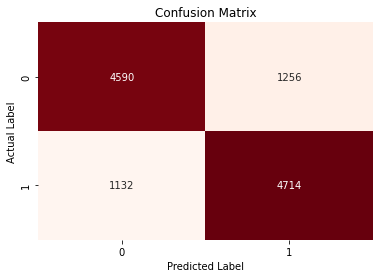


 Classification Report
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      5846
           1       0.79      0.81      0.80      5846

    accuracy                           0.80     11692
   macro avg       0.80      0.80      0.80     11692
weighted avg       0.80      0.80      0.80     11692



AUC: 0.870


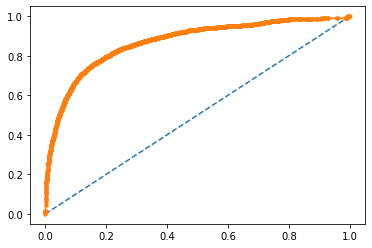




TEST METRICS


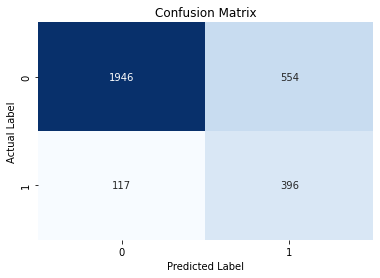


 Classification Report
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      2500
           1       0.42      0.77      0.54       513

    accuracy                           0.78      3013
   macro avg       0.68      0.78      0.70      3013
weighted avg       0.85      0.78      0.80      3013



AUC: 0.845


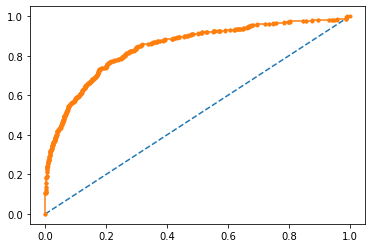



Cross Validation score for Logistic Regression Model: 
Bias Error: 0.12060455981555795
Variance Error: 0.005045730581445565



Comparision Table
   precision  recall  f1-score                Model    SET    AUC  Accuracy  \
0     0.8022  0.7852  0.793568  Logistic Regression  Train  0.870    0.7958   
1     0.7896  0.8064  0.797901  Logistic Regression  Train  0.870    0.7958   
0     0.9433  0.7784  0.852948  Logistic Regression   Test  0.845    0.7773   
1     0.4168  0.7719  0.541353  Logistic Regression   Test  0.845    0.7773   

   Bias Error  Variance Error  
0      0.1206           0.005  
1      0.1206           0.005  
0      0.1206           0.005  
1      0.1206           0.005  


In [ ]:
log=LogisticRegression()
log.fit(xtrain,trainlabels)
log_ytrain_predict,log_ytest_predict,log_train_accuracy,log_test_accuracy,log_train_auc,log_test_auc,log_bias_error,log_variance_error,log_train_test_df=model_eval(log,x,y,xtrain,xtest,trainlabels,testlabels,'Logistic Regression')

## Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

TRAIN METRICS
Accuracy of Train set for LDA is 0.781
Accuracy of Test set for LDA is 0.7541




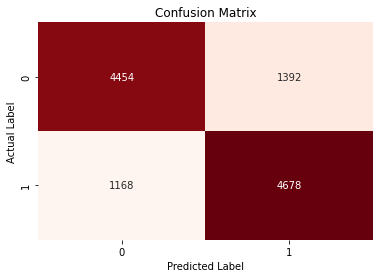


 Classification Report
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      5846
           1       0.77      0.80      0.79      5846

    accuracy                           0.78     11692
   macro avg       0.78      0.78      0.78     11692
weighted avg       0.78      0.78      0.78     11692



AUC: 0.852


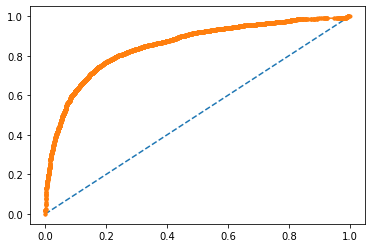




TEST METRICS


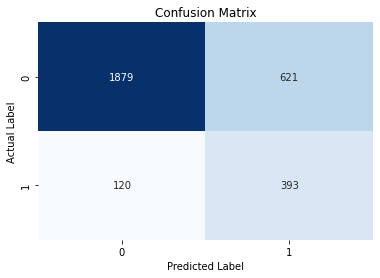


 Classification Report
              precision    recall  f1-score   support

           0       0.94      0.75      0.84      2500
           1       0.39      0.77      0.51       513

    accuracy                           0.75      3013
   macro avg       0.66      0.76      0.68      3013
weighted avg       0.85      0.75      0.78      3013



AUC: 0.824


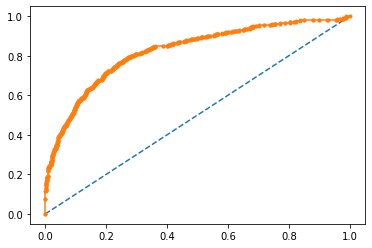



Cross Validation score for LDA Model: 
Bias Error: 0.135643370523023
Variance Error: 0.0034133535251431326



Comparision Table
   precision  recall  f1-score Model    SET     AUC  Accuracy  Bias Error  \
0     0.7922  0.7619  0.776770   LDA  Train  0.8517    0.7810      0.1356   
1     0.7707  0.8002  0.785163   LDA  Train  0.8517    0.7810      0.1356   
0     0.9400  0.7516  0.835297   LDA   Test  0.8243    0.7541      0.1356   
1     0.3876  0.7661  0.514735   LDA   Test  0.8243    0.7541      0.1356   

   Variance Error  
0          0.0034  
1          0.0034  
0          0.0034  
1          0.0034  


In [ ]:
lda=LinearDiscriminantAnalysis()
lda.fit(xtrain,trainlabels)
lda_ytrain_predict,lda_ytest_predict,lda_train_accuracy,lda_test_accuracy,lda_train_auc,lda_test_auc,lda_bias_error,lda_variance_error,lda_train_test_df=model_eval(lda,x,y,xtrain,xtest,trainlabels,testlabels,'LDA')

# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

TRAIN METRICS
Accuracy of Train set for Naive Bayes is 0.7531
Accuracy of Test set for Naive Bayes is 0.7156




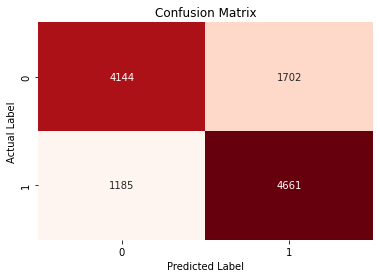


 Classification Report
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      5846
           1       0.73      0.80      0.76      5846

    accuracy                           0.75     11692
   macro avg       0.76      0.75      0.75     11692
weighted avg       0.76      0.75      0.75     11692



AUC: 0.838


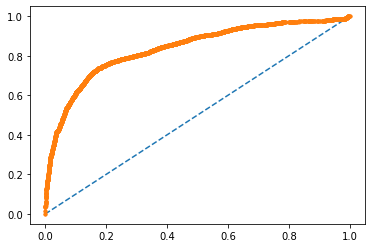




TEST METRICS


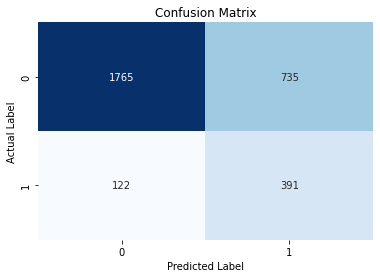


 Classification Report
              precision    recall  f1-score   support

           0       0.94      0.71      0.80      2500
           1       0.35      0.76      0.48       513

    accuracy                           0.72      3013
   macro avg       0.64      0.73      0.64      3013
weighted avg       0.84      0.72      0.75      3013



AUC: 0.802


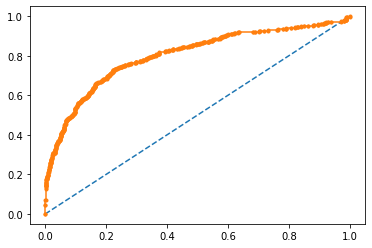



Cross Validation score for Naive Bayes Model: 
Bias Error: 0.13424894807397403
Variance Error: 0.005851628025450178



Comparision Table
   precision  recall  f1-score        Model    SET     AUC  Accuracy  \
0     0.7776  0.7089  0.741655  Naive Bayes  Train  0.8375    0.7531   
1     0.7325  0.7973  0.763535  Naive Bayes  Train  0.8375    0.7531   
0     0.9353  0.7060  0.804650  Naive Bayes   Test  0.8023    0.7156   
1     0.3472  0.7622  0.477120  Naive Bayes   Test  0.8023    0.7156   

   Bias Error  Variance Error  
0      0.1342          0.0059  
1      0.1342          0.0059  
0      0.1342          0.0059  
1      0.1342          0.0059  


In [ ]:
nb=GaussianNB()

nb.fit(xtrain,trainlabels)
nb_ytrain_predict,nb_ytest_predict,nb_train_accuracy,nb_test_accuracy,nb_train_auc,nb_test_auc,nb_bias_error,nb_variance_error,nb_train_test_df=model_eval(nb,x,y,xtrain,xtest,trainlabels,testlabels,'Naive Bayes')

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

TRAIN METRICS
Accuracy of Train set for KNN is 0.8354
Accuracy of Test set for KNN is 0.7624




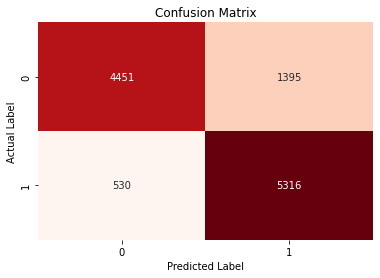


 Classification Report
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      5846
           1       0.79      0.91      0.85      5846

    accuracy                           0.84     11692
   macro avg       0.84      0.84      0.83     11692
weighted avg       0.84      0.84      0.83     11692



AUC: 0.928


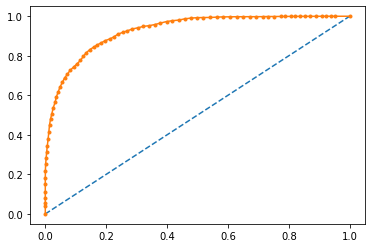




TEST METRICS


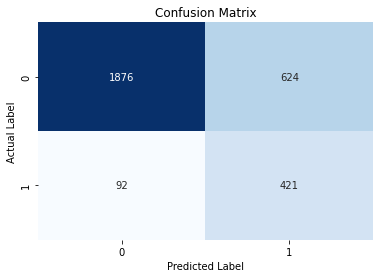


 Classification Report
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2500
           1       0.40      0.82      0.54       513

    accuracy                           0.76      3013
   macro avg       0.68      0.79      0.69      3013
weighted avg       0.86      0.76      0.79      3013



AUC: 0.878


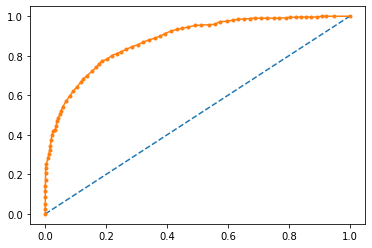



Cross Validation score for KNN Model: 
Bias Error: 0.12209895081616684
Variance Error: 0.005597667568008453



Comparision Table
   precision  recall  f1-score Model    SET     AUC  Accuracy  Bias Error  \
0     0.8936  0.7614  0.822204   KNN  Train  0.9275    0.8354      0.1221   
1     0.7921  0.9093  0.846699   KNN  Train  0.9275    0.8354      0.1221   
0     0.9533  0.7504  0.839749   KNN   Test  0.8779    0.7624      0.1221   
1     0.4029  0.8207  0.540436   KNN   Test  0.8779    0.7624      0.1221   

   Variance Error  
0          0.0056  
1          0.0056  
0          0.0056  
1          0.0056  


In [ ]:
k=int(np.sqrt(len(xtrain)/2))
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(xtrain,trainlabels)
knn_ytrain_predict,knn_ytest_predict,knn_train_accuracy,knn_test_accuracy,knn_train_auc,knn_test_auc,knn_bias_error,knn_variance_error,knn_train_test_df=model_eval(knn,x,y,xtrain,xtest,trainlabels,testlabels,'KNN')

### ANN Classifier

TRAIN METRICS
Accuracy of Train set for ANN is 0.9968
Accuracy of Test set for ANN is 0.9535




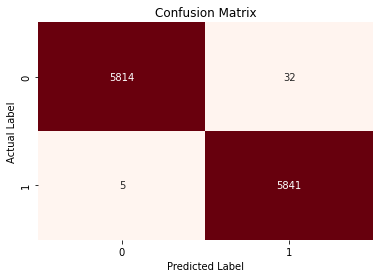


 Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5846
           1       0.99      1.00      1.00      5846

    accuracy                           1.00     11692
   macro avg       1.00      1.00      1.00     11692
weighted avg       1.00      1.00      1.00     11692



AUC: 1.000


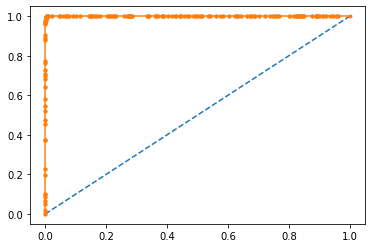




TEST METRICS


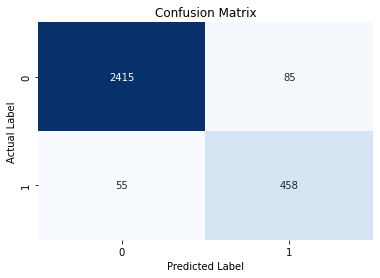


 Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2500
           1       0.84      0.89      0.87       513

    accuracy                           0.95      3013
   macro avg       0.91      0.93      0.92      3013
weighted avg       0.95      0.95      0.95      3013



AUC: 0.979


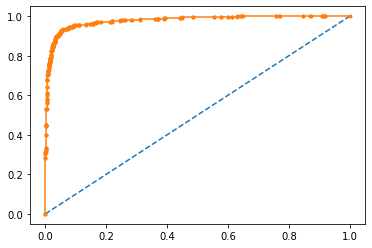



Cross Validation score for ANN Model: 
Bias Error: 0.07648607764363013
Variance Error: 0.00621745733398776



Comparision Table
   precision  recall  f1-score Model    SET     AUC  Accuracy  Bias Error  \
0     0.9991  0.9945  0.996828   ANN  Train  1.0000    0.9968      0.0765   
1     0.9946  0.9991  0.996843   ANN  Train  1.0000    0.9968      0.0765   
0     0.9777  0.9660  0.971831   ANN   Test  0.9785    0.9535      0.0765   
1     0.8435  0.8928  0.867424   ANN   Test  0.9785    0.9535      0.0765   

   Variance Error  
0          0.0062  
1          0.0062  
0          0.0062  
1          0.0062  


In [ ]:
from sklearn.neural_network import MLPClassifier

ann=MLPClassifier()
ann.fit(xtrain,trainlabels)
ann_ytrain_predict,ann_ytest_predict,ann_train_accuracy,ann_test_accuracy,ann_train_auc,ann_test_auc,ann_bias_error,ann_variance_error,ann_train_test_df=model_eval(ann,x,y,xtrain,xtest,trainlabels,testlabels,'ANN')

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

TRAIN METRICS
Accuracy of Train set for Gradient Boosting is 0.9295
Accuracy of Test set for Gradient Boosting is 0.8974




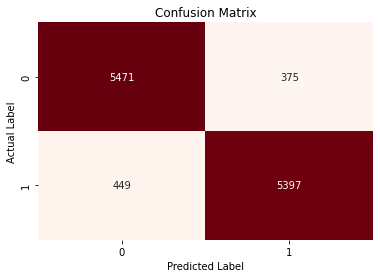


 Classification Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5846
           1       0.94      0.92      0.93      5846

    accuracy                           0.93     11692
   macro avg       0.93      0.93      0.93     11692
weighted avg       0.93      0.93      0.93     11692



AUC: 0.981


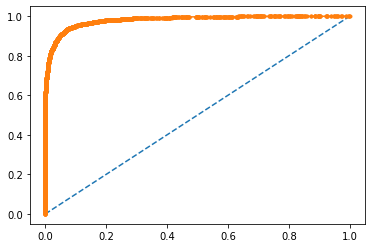




TEST METRICS


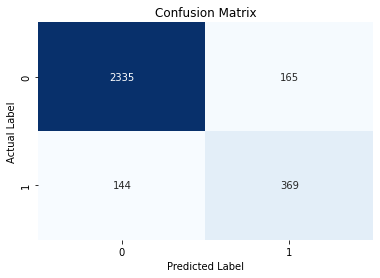


 Classification Report
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2500
           1       0.69      0.72      0.70       513

    accuracy                           0.90      3013
   macro avg       0.82      0.83      0.82      3013
weighted avg       0.90      0.90      0.90      3013



AUC: 0.932


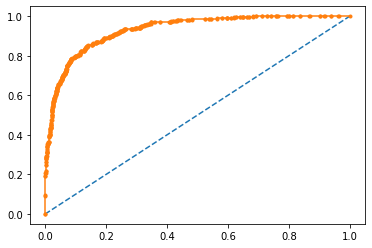



Cross Validation score for Gradient Boosting Model: 
Bias Error: 0.0879390719447285
Variance Error: 0.0035722741056897975



Comparision Table
   precision  recall  f1-score              Model    SET     AUC  Accuracy  \
0     0.9242  0.9359  0.929968  Gradient Boosting  Train  0.9809    0.9295   
1     0.9350  0.9232  0.929076  Gradient Boosting  Train  0.9809    0.9295   
0     0.9419  0.9340  0.937939  Gradient Boosting   Test  0.9321    0.8974   
1     0.6910  0.7193  0.704871  Gradient Boosting   Test  0.9321    0.8974   

   Bias Error  Variance Error  
0      0.0879          0.0036  
1      0.0879          0.0036  
0      0.0879          0.0036  
1      0.0879          0.0036  


In [ ]:
gbcl = GradientBoostingClassifier()
gbcl = gbcl.fit(xtrain, trainlabels)
gb_ytrain_predict,gb_ytest_predict,gb_train_accuracy,gb_test_accuracy,gb_train_auc,gb_test_auc,gb_bias_error,gb_variance_error,gb_train_test_df=model_eval(gbcl,x,y,xtrain,xtest,trainlabels,testlabels,'Gradient Boosting')

# Ada Boosting

TRAIN METRICS
Accuracy of Train set for ADA Boosting is 0.8824
Accuracy of Test set for ADA Boosting is 0.8646




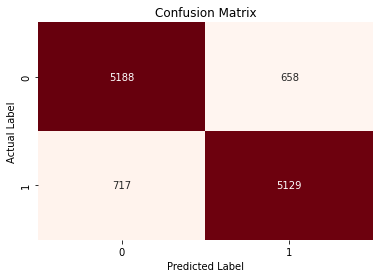


 Classification Report
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      5846
           1       0.89      0.88      0.88      5846

    accuracy                           0.88     11692
   macro avg       0.88      0.88      0.88     11692
weighted avg       0.88      0.88      0.88     11692



AUC: 0.956


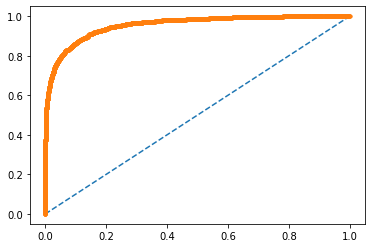




TEST METRICS


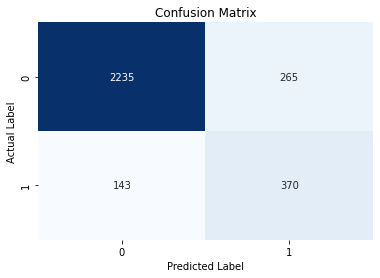


 Classification Report
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      2500
           1       0.58      0.72      0.64       513

    accuracy                           0.86      3013
   macro avg       0.76      0.81      0.78      3013
weighted avg       0.88      0.86      0.87      3013



AUC: 0.896


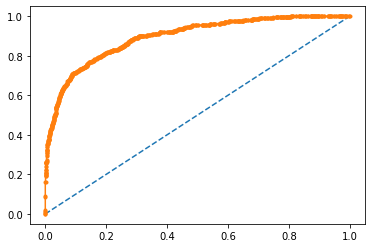



Cross Validation score for ADA Boosting Model: 
Bias Error: 0.10317726437447117
Variance Error: 0.0034831857190558185



Comparision Table
   precision  recall  f1-score         Model    SET     AUC  Accuracy  \
0     0.8786  0.8874  0.882989  ADA Boosting  Train  0.9555    0.8824   
1     0.8863  0.8774  0.881802  ADA Boosting  Train  0.9555    0.8824   
0     0.9399  0.8940  0.916359  ADA Boosting   Test  0.8955    0.8646   
1     0.5827  0.7212  0.644599  ADA Boosting   Test  0.8955    0.8646   

   Bias Error  Variance Error  
0      0.1032          0.0035  
1      0.1032          0.0035  
0      0.1032          0.0035  
1      0.1032          0.0035  


In [ ]:
ada = AdaBoostClassifier()
ada = ada.fit(xtrain, trainlabels)
ada_ytrain_predict,ada_ytest_predict,ada_train_accuracy,ada_test_accuracy,ada_train_auc,ada_test_auc,ada_bias_error,ada_variance_error,ada_train_test_df=model_eval(ada,x,y,xtrain,xtest,trainlabels,testlabels,'ADA Boosting')

### Observation:

From the above models we can observe that there is no better recall than Logistic regression, Hence we are tuning the above models to check if we get better recall, as our business case is to find the churning customers and we are building a model with good recall (True Positive Rate) so that we can find the customers who are going to churn.

## Basic model Metric

In [ ]:
basic_train_test_df=pd.concat([log_train_test_df,knn_train_test_df,nb_train_test_df,ann_train_test_df,lda_train_test_df,gb_train_test_df,ada_train_test_df])
basic_train_test_df.reset_index(inplace=True)
basic_train_test_df.rename(columns={'index':'Target Class'},inplace=True)
basic_train_test_df

,Target Class,precision,recall,f1-score,Model,SET,AUC,Accuracy,Bias Error,Variance Error
0,0,0.8022,0.7852,0.793568,Logistic Regression,Train,0.8700,0.7958,0.1206,0.0050
1,1,0.7896,0.8064,0.797901,Logistic Regression,Train,0.8700,0.7958,0.1206,0.0050
2,0,0.9433,0.7784,0.852948,Logistic Regression,Test,0.8450,0.7773,0.1206,0.0050
3,1,0.4168,0.7719,0.541353,Logistic Regression,Test,0.8450,0.7773,0.1206,0.0050
4,0,0.8936,0.7614,0.822204,KNN,Train,0.9275,0.8354,0.1221,0.0056
5,1,0.7921,0.9093,0.846699,KNN,Train,0.9275,0.8354,0.1221,0.0056
6,0,0.9533,0.7504,0.839749,KNN,Test,0.8779,0.7624,0.1221,0.0056
7,1,0.4029,0.8207,0.540436,KNN,Test,0.8779,0.7624,0.1221,0.0056
8,0,0.7776,0.7089,0.741655,Naive Bayes,Train,0.8375,0.7531,0.1342,0.0059
9,1,0.7325,0.7973,0.763535,Naive Bayes,Train,0.8375,0.7531,0.1342,0.0059


In [ ]:
basic_train_test_df=basic_train_test_df[basic_train_test_df['Target Class']=='1']
basic_train_test_df=basic_train_test_df[['Model','SET','Accuracy','precision','recall','f1-score','AUC','Bias Error','Variance Error']]
basic_train_test_df

,Model,SET,Accuracy,precision,recall,f1-score,AUC,Bias Error,Variance Error
1,Logistic Regression,Train,0.7958,0.7896,0.8064,0.797901,0.8700,0.1206,0.0050
3,Logistic Regression,Test,0.7773,0.4168,0.7719,0.541353,0.8450,0.1206,0.0050
5,KNN,Train,0.8354,0.7921,0.9093,0.846699,0.9275,0.1221,0.0056
7,KNN,Test,0.7624,0.4029,0.8207,0.540436,0.8779,0.1221,0.0056
9,Naive Bayes,Train,0.7531,0.7325,0.7973,0.763535,0.8375,0.1342,0.0059
11,Naive Bayes,Test,0.7156,0.3472,0.7622,0.477120,0.8023,0.1342,0.0059
13,ANN,Train,0.9968,0.9946,0.9991,0.996843,1.0000,0.0765,0.0062
15,ANN,Test,0.9535,0.8435,0.8928,0.867424,0.9785,0.0765,0.0062
17,LDA,Train,0.7810,0.7707,0.8002,0.785163,0.8517,0.1356,0.0034
19,LDA,Test,0.7541,0.3876,0.7661,0.514735,0.8243,0.1356,0.0034


# **Tuned Models**

## Logistic Regression Tuned

The best Estimators are LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
TRAIN METRICS
Accuracy of Train set for Logistic Regression Tuned is 0.7958
Accuracy of Test set for Logistic Regression Tuned is 0.7773




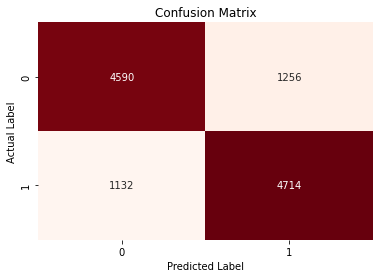


 Classification Report
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      5846
           1       0.79      0.81      0.80      5846

    accuracy                           0.80     11692
   macro avg       0.80      0.80      0.80     11692
weighted avg       0.80      0.80      0.80     11692



AUC: 0.870


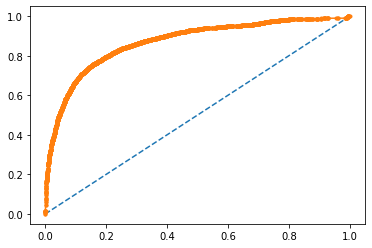




TEST METRICS


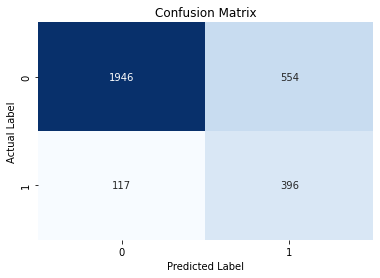


 Classification Report
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      2500
           1       0.42      0.77      0.54       513

    accuracy                           0.78      3013
   macro avg       0.68      0.78      0.70      3013
weighted avg       0.85      0.78      0.80      3013



AUC: 0.845


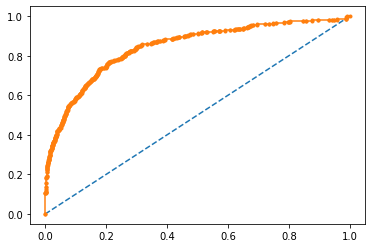



Cross Validation score for Logistic Regression Tuned Model: 
Bias Error: 0.12060449039295285
Variance Error: 0.00456710379874835



Comparision Table
   precision  recall  f1-score                      Model    SET     AUC  \
0     0.8022  0.7852  0.793568  Logistic Regression Tuned  Train  0.8700   
1     0.7896  0.8064  0.797901  Logistic Regression Tuned  Train  0.8700   
0     0.9433  0.7784  0.852948  Logistic Regression Tuned   Test  0.8451   
1     0.4168  0.7719  0.541353  Logistic Regression Tuned   Test  0.8451   

   Accuracy  Bias Error  Variance Error  
0    0.7958      0.1206          0.0046  
1    0.7958      0.1206          0.0046  
0    0.7773      0.1206          0.0046  
1    0.7773      0.1206          0.0046  


In [ ]:
log=LogisticRegression()
param={
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty':['none','l1','l2','elastinet'],
    'C':[100,10,0.1,0.01]
}
log_grid=GridSearchCV(estimator=log,param_grid=param,n_jobs=-1,cv=5)
log_grid.fit(xtrain,trainlabels)
print('The best Estimators are '+str(log_grid.best_estimator_))
log_tuned_ytrain_predict,log_tuned_ytest_predict,log_tuned_train_accuracy,log_tuned_test_accuracy,log_tuned_train_auc,log_tuned_test_auc,log_tuned_bias_error,log_tuned_variance_error,log_tuned_train_test_df=model_eval(log_grid,x,y,xtrain,xtest,trainlabels,testlabels,'Logistic Regression Tuned')

### LINEAR DISCRIMINANT ANALYSIS TUNED

The best Estimators are LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='lsqr', store_covariance=False, tol=0.1)
TRAIN METRICS
Accuracy of Train set for LDA_TUNED is 0.781
Accuracy of Test set for LDA_TUNED is 0.7541




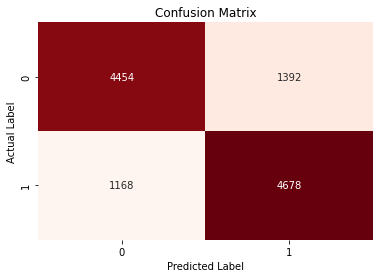


 Classification Report
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      5846
           1       0.77      0.80      0.79      5846

    accuracy                           0.78     11692
   macro avg       0.78      0.78      0.78     11692
weighted avg       0.78      0.78      0.78     11692



AUC: 0.852


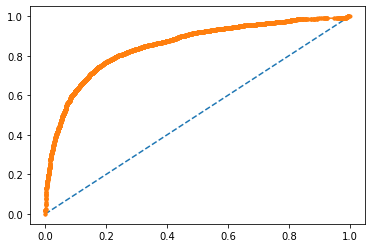




TEST METRICS


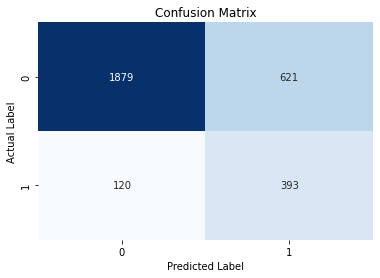


 Classification Report
              precision    recall  f1-score   support

           0       0.94      0.75      0.84      2500
           1       0.39      0.77      0.51       513

    accuracy                           0.75      3013
   macro avg       0.66      0.76      0.68      3013
weighted avg       0.85      0.75      0.78      3013



AUC: 0.824


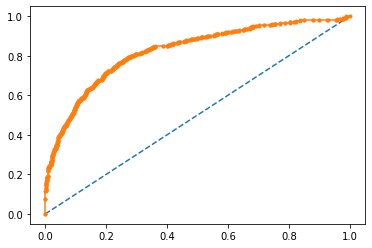



Cross Validation score for LDA_TUNED Model: 
Bias Error: 0.13584261340009007
Variance Error: 0.0033244573904469554



Comparision Table
   precision  recall  f1-score      Model    SET     AUC  Accuracy  \
0     0.7922  0.7619  0.776770  LDA_TUNED  Train  0.8517    0.7810   
1     0.7707  0.8002  0.785163  LDA_TUNED  Train  0.8517    0.7810   
0     0.9400  0.7516  0.835297  LDA_TUNED   Test  0.8243    0.7541   
1     0.3876  0.7661  0.514735  LDA_TUNED   Test  0.8243    0.7541   

   Bias Error  Variance Error  
0      0.1358          0.0033  
1      0.1358          0.0033  
0      0.1358          0.0033  
1      0.1358          0.0033  


In [ ]:
lda_grid=LinearDiscriminantAnalysis()
param_grid={
    'solver':['lsqr','svd','eigen'],
    'tol':[0.1,0.01,0.001,10,100]
}
lda_grid=GridSearchCV(estimator=lda_grid,param_grid=param_grid,cv=5,n_jobs=-1)
lda_grid.fit(xtrain,trainlabels)
print('The best Estimators are '+str(lda_grid.best_estimator_))
lda_tuned_ytrain_predict,lda_tuned_ytest_predict,lda_tuned_train_accuracy,lda_tuned_test_accuracy,lda_tuned_train_auc,lda_tuned_test_auc,lda_tuned_bias_error,lda_tuned_variance_error,lda_tuned_train_test_df=model_eval(lda_grid,x,y,xtrain,xtest,trainlabels,testlabels,'LDA_TUNED')

### KNN CLASSIFIER TUNED

The best Estimators are KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
TRAIN METRICS
Accuracy of Train set for KNN_TUNED is 0.9999
Accuracy of Test set for KNN_TUNED is 0.9701




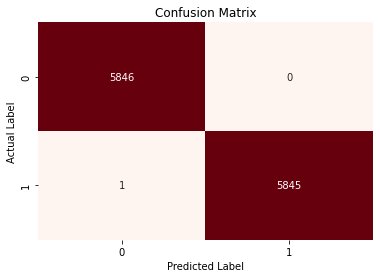


 Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5846
           1       1.00      1.00      1.00      5846

    accuracy                           1.00     11692
   macro avg       1.00      1.00      1.00     11692
weighted avg       1.00      1.00      1.00     11692



AUC: 1.000


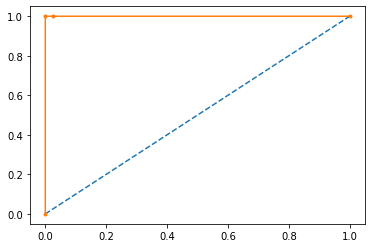




TEST METRICS


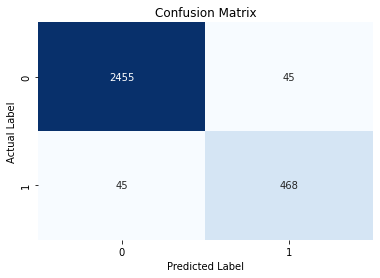


 Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2500
           1       0.91      0.91      0.91       513

    accuracy                           0.97      3013
   macro avg       0.95      0.95      0.95      3013
weighted avg       0.97      0.97      0.97      3013



AUC: 0.971


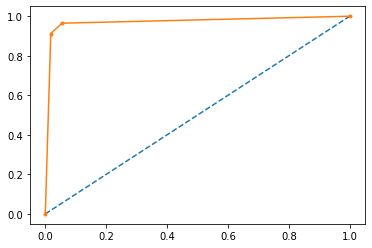



Cross Validation score for KNN_TUNED Model: 
Bias Error: 0.019818695924129548
Variance Error: 0.004531234622386771



Comparision Table
   precision  recall  f1-score      Model    SET     AUC  Accuracy  \
0     0.9998  1.0000  0.999914  KNN_TUNED  Train  1.0000    0.9999   
1     1.0000  0.9998  0.999914  KNN_TUNED  Train  1.0000    0.9999   
0     0.9820  0.9820  0.982000  KNN_TUNED   Test  0.9714    0.9701   
1     0.9123  0.9123  0.912281  KNN_TUNED   Test  0.9714    0.9701   

   Bias Error  Variance Error  
0      0.0198          0.0045  
1      0.0198          0.0045  
0      0.0198          0.0045  
1      0.0198          0.0045  


In [ ]:
knn_grid=KNeighborsClassifier()
param={
    'n_neighbors':range(1,21)
}
knn_grid=GridSearchCV(estimator=knn_grid,param_grid=param,n_jobs=-1,cv=5)
knn_grid.fit(xtrain,trainlabels)
print('The best Estimators are '+str(knn_grid.best_estimator_))
knn_tuned_ytrain_predict,knn_tuned_ytest_predict,knn_tuned_train_accuracy,knn_tuned_test_accuracy,knn_tuned_train_auc,knn_tuned_test_auc,knn_tuned_bias_error,knn_tuned_variance_error,knn_tuned_train_test_df=model_eval(knn_grid,x,y,xtrain,xtest,trainlabels,testlabels,'KNN_TUNED')

### Naive Bayes Classifier Tuned

The best Estimators are GaussianNB(priors=None, var_smoothing=0.0001)
TRAIN METRICS
Accuracy of Train set for Naive Bayes TUNED is 0.7531
Accuracy of Test set for Naive Bayes TUNED is 0.7156




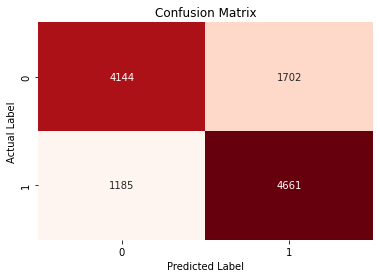


 Classification Report
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      5846
           1       0.73      0.80      0.76      5846

    accuracy                           0.75     11692
   macro avg       0.76      0.75      0.75     11692
weighted avg       0.76      0.75      0.75     11692



AUC: 0.838


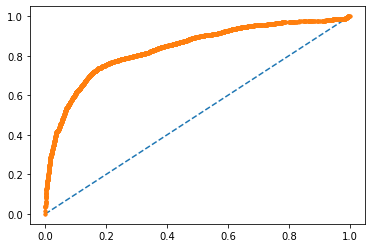




TEST METRICS


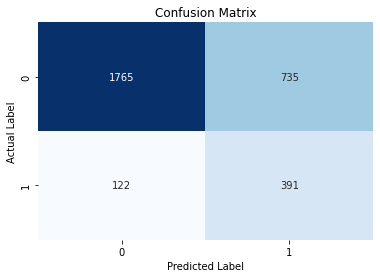


 Classification Report
              precision    recall  f1-score   support

           0       0.94      0.71      0.80      2500
           1       0.35      0.76      0.48       513

    accuracy                           0.72      3013
   macro avg       0.64      0.73      0.64      3013
weighted avg       0.84      0.72      0.75      3013



AUC: 0.802


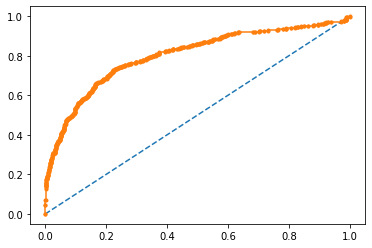



Cross Validation score for Naive Bayes TUNED Model: 
Bias Error: 0.1344484686414621
Variance Error: 0.004469616679194762



Comparision Table
   precision  recall  f1-score              Model    SET     AUC  Accuracy  \
0     0.7776  0.7089  0.741655  Naive Bayes TUNED  Train  0.8375    0.7531   
1     0.7325  0.7973  0.763535  Naive Bayes TUNED  Train  0.8375    0.7531   
0     0.9353  0.7060  0.804650  Naive Bayes TUNED   Test  0.8023    0.7156   
1     0.3472  0.7622  0.477120  Naive Bayes TUNED   Test  0.8023    0.7156   

   Bias Error  Variance Error  
0      0.1344          0.0045  
1      0.1344          0.0045  
0      0.1344          0.0045  
1      0.1344          0.0045  


In [ ]:
nb_grid=GaussianNB()
param={
    'var_smoothing':[0.01,0.01,0.0001,0.000001,0.00000001,0.0000000000001]
}
nb_grid=GridSearchCV(estimator=nb_grid,n_jobs=-1,cv=5,param_grid=param)
nb_grid.fit(xtrain,trainlabels)
print('The best Estimators are '+str(nb_grid.best_estimator_))
nb_tuned_ytrain_predict,nb_tuned_ytest_predict,nb_tuned_train_accuracy,nb_tuned_test_accuracy,nb_tuned_train_auc,nb_tuned_test_auc,nb_tuned_bias_error,nb_tuned_variance_error,nb_tuned_train_test_df=model_eval(nb_grid,x,y,xtrain,xtest,trainlabels,testlabels,'Naive Bayes TUNED')

# ANN Tuned

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  5.8min finished


The best Estimators are MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
TRAIN METRICS
Accuracy of Train set for ANN Tuned is 0.9796
Accuracy of Test set for ANN Tuned is 0.9187




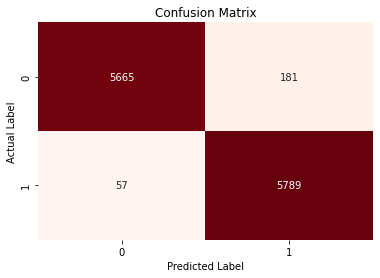


 Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5846
           1       0.97      0.99      0.98      5846

    accuracy                           0.98     11692
   macro avg       0.98      0.98      0.98     11692
weighted avg       0.98      0.98      0.98     11692



AUC: 0.997


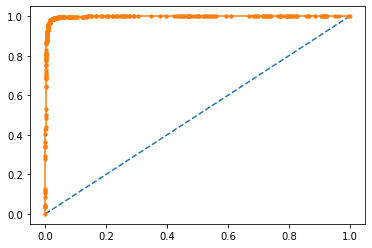




TEST METRICS


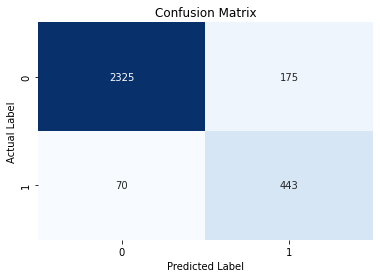


 Classification Report
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2500
           1       0.72      0.86      0.78       513

    accuracy                           0.92      3013
   macro avg       0.84      0.90      0.87      3013
weighted avg       0.93      0.92      0.92      3013



AUC: 0.957


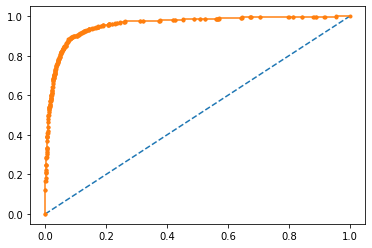



Cross Validation score for ANN Tuned Model: 
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  4.2min finished


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  4.2min finished


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  4.3min finished


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  4.2min finished


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  4.2min finished


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  4.2min finished


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  4.2min finished


Bias Error: 0.08515154607613018
Variance Error: 0.006700804965311437



Comparision Table
   precision  recall  f1-score      Model    SET     AUC  Accuracy  \
0     0.9900  0.9690  0.979426  ANN Tuned  Train  0.9974    0.9796   
1     0.9697  0.9902  0.979858  ANN Tuned  Train  0.9974    0.9796   
0     0.9708  0.9300  0.949949  ANN Tuned   Test  0.9574    0.9187   
1     0.7168  0.8635  0.783378  ANN Tuned   Test  0.9574    0.9187   

   Bias Error  Variance Error  
0      0.0852          0.0067  
1      0.0852          0.0067  
0      0.0852          0.0067  
1      0.0852          0.0067  


In [ ]:
ann_tuned=MLPClassifier()
params={
    'hidden_layer_sizes':[10,25,50,(20,20)],
    # 'max_iter':[125,150,200],
    'solver':['sgd','adam'],
    'tol':[0.0001,0.00001]
}
ann_grid=GridSearchCV(estimator=ann_tuned,param_grid=params,cv=5,n_jobs=-1,verbose=True)
ann_grid.fit(xtrain,trainlabels)
print('The best Estimators are '+str(ann_grid.best_estimator_))
ann_tuned_ytrain_predict,ann_tuned_ytest_predict,ann_tuned_train_accuracy,ann_tuned_test_accuracy,ann_tuned_train_auc,ann_tuned_test_auc,ann_tuned_bias_error,ann_tuned_variance_error,ann_tuned_train_test_df=model_eval(ann_grid,x,y,xtrain,xtest,trainlabels,testlabels,'ANN Tuned')

# Gradient Boosting Tuned

gb_tuned=GradientBoostingClassifier()
params={'min_samples_split':np.arange(100,300,50),'min_samples_leaf':np.arange(300,600,150),
        'n_estimators':np.arange(100,300,100),'max_depth':[10,12,14],'max_features':['sqrt','log2',None],
       'loss':['deviance','exponential']}
gb_grid=GridSearchCV(gb_tuned,params,n_jobs=-1)
gb_grid.fit(xtrain,trainlabels)
gb_grid.best_params_


## Observation: out of the above parameters used for Gradient boosing, only the best params are taken to build the model directly

In [ ]:
gb_tuned=GradientBoostingClassifier()
# params={'min_samples_split':np.arange(100,300,50),'min_samples_leaf':np.arange(300,600,150),
#         'n_estimators':np.arange(100,300,100),'max_depth':[12,14,16],'max_features':['sqrt','log2',None],
#        'loss':['deviance','exponential']}
# gb_grid=GridSearchCV(gb_tuned,params,n_jobs=-1)
# gb_grid.fit(xtrain,trainlabels)
# gb_grid.best_params_

In [ ]:
param={'loss': ['exponential'],
 'max_depth': [14],
 'max_features': ['log2'],
 'min_samples_leaf': [100],
 'min_samples_split': [150],
 'n_estimators': [250]}
gb_tuned=GradientBoostingClassifier()
gb_grid=GridSearchCV(gb_tuned,param,n_jobs=-1)
gb_grid.fit(xtrain,trainlabels)


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...
                 

In [ ]:
gb_grid.best_params_

{'loss': 'exponential',
 'max_depth': 14,
 'max_features': 'log2',
 'min_samples_leaf': 100,
 'min_samples_split': 150,
 'n_estimators': 250}

TRAIN METRICS
Accuracy of Train set for GB Tuned is 1.0
Accuracy of Test set for GB Tuned is 0.9668




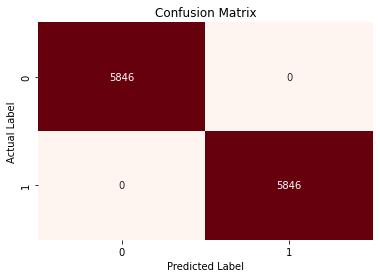


 Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5846
           1       1.00      1.00      1.00      5846

    accuracy                           1.00     11692
   macro avg       1.00      1.00      1.00     11692
weighted avg       1.00      1.00      1.00     11692



AUC: 1.000


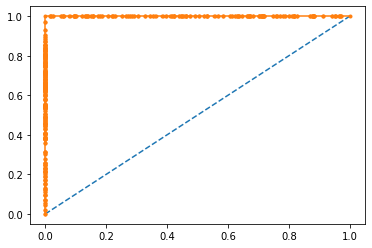




TEST METRICS


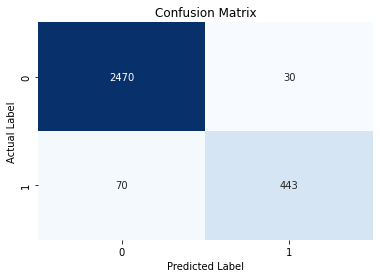


 Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2500
           1       0.94      0.86      0.90       513

    accuracy                           0.97      3013
   macro avg       0.95      0.93      0.94      3013
weighted avg       0.97      0.97      0.97      3013



AUC: 0.992


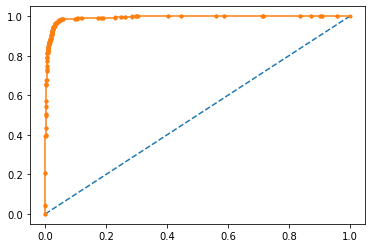



Cross Validation score for GB Tuned Model: 
Bias Error: 0.02201071468489424
Variance Error: 0.005787292289679067



Comparision Table
   precision  recall  f1-score     Model    SET     AUC  Accuracy  Bias Error  \
0     1.0000  1.0000  1.000000  GB Tuned  Train  1.0000    1.0000       0.022   
1     1.0000  1.0000  1.000000  GB Tuned  Train  1.0000    1.0000       0.022   
0     0.9724  0.9880  0.980159  GB Tuned   Test  0.9923    0.9668       0.022   
1     0.9366  0.8635  0.898580  GB Tuned   Test  0.9923    0.9668       0.022   

   Variance Error  
0          0.0058  
1          0.0058  
0          0.0058  
1          0.0058  


In [ ]:
gb_tuned=GradientBoostingClassifier(loss='exponential',max_depth=14,max_features='log2',min_samples_leaf=100,min_samples_split=150,n_estimators=250)
gb_tuned.fit(xtrain,trainlabels)
gb_tuned_ytrain_predict,gb_tuned_ytest_predict,gb_tuned_train_accuracy,gb_tuned_test_accuracy,gb_tuned_train_auc,gb_tuned_test_auc,gb_tuned_bias_error,gb_tuned_variance_error,gb_tuned_train_test_df=model_eval(gb_tuned,x,y,xtrain,xtest,trainlabels,testlabels,'GB Tuned')

### Ada Boosting Tuned

In [ ]:
ada_grid=AdaBoostClassifier()
params={'n_estimators':np.arange(50,250,50),'algorithm':['SAMME','SAMME.R']}
ada_grid=GridSearchCV(ada_grid,params,n_jobs=-1)
ada_grid.fit(xtrain,trainlabels)
ada_grid.best_params_

{'algorithm': 'SAMME.R', 'n_estimators': 200}

TRAIN METRICS
Accuracy of Train set for ADA Tuned is 0.9158
Accuracy of Test set for ADA Tuned is 0.8789




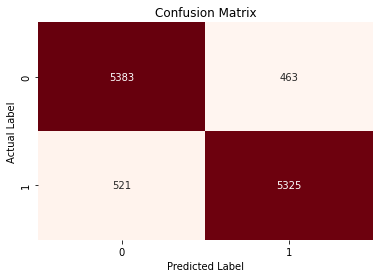


 Classification Report
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      5846
           1       0.92      0.91      0.92      5846

    accuracy                           0.92     11692
   macro avg       0.92      0.92      0.92     11692
weighted avg       0.92      0.92      0.92     11692



AUC: 0.974


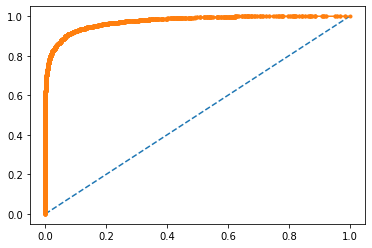




TEST METRICS


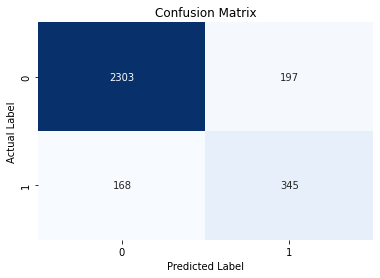


 Classification Report
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2500
           1       0.64      0.67      0.65       513

    accuracy                           0.88      3013
   macro avg       0.78      0.80      0.79      3013
weighted avg       0.88      0.88      0.88      3013



AUC: 0.901


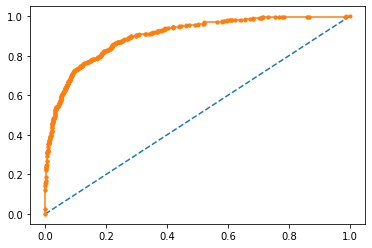



Cross Validation score for ADA Tuned Model: 
Bias Error: 0.10118546040724685
Variance Error: 0.0020709412119701022



Comparision Table
   precision  recall  f1-score      Model    SET     AUC  Accuracy  \
0     0.9118  0.9208  0.916255  ADA Tuned  Train  0.9740    0.9158   
1     0.9200  0.9109  0.915420  ADA Tuned  Train  0.9740    0.9158   
0     0.9320  0.9212  0.926574  ADA Tuned   Test  0.9007    0.8789   
1     0.6365  0.6725  0.654028  ADA Tuned   Test  0.9007    0.8789   

   Bias Error  Variance Error  
0      0.1012          0.0021  
1      0.1012          0.0021  
0      0.1012          0.0021  
1      0.1012          0.0021  


In [ ]:
ada_tuned_ytrain_predict,ada_tuned_ytest_predict,ada_tuned_train_accuracy,ada_tuned_test_accuracy,ada_tuned_train_auc,ada_tuned_test_auc,ada_tuned_bias_error,ada_tuned_variance_error,ada_tuned_train_test_df=model_eval(ada_grid,x,y,xtrain,xtest,trainlabels,testlabels,'ADA Tuned')

# Tuned Model Metrics

In [ ]:
Tuned_train_test_df=pd.concat([log_tuned_train_test_df,knn_tuned_train_test_df,nb_tuned_train_test_df,ann_tuned_train_test_df,lda_tuned_train_test_df,gb_tuned_train_test_df,ada_tuned_train_test_df])
Tuned_train_test_df.reset_index(inplace=True)
Tuned_train_test_df.rename(columns={'index':'Target Class'},inplace=True)
Tuned_train_test_df['Target Class']=Tuned_train_test_df['Target Class'].apply(lambda x: '0' if x in ('0.0','0') else '1')
Tuned_train_test_df

,Target Class,precision,recall,f1-score,Model,SET,AUC,Accuracy,Bias Error,Variance Error
0,0,0.8022,0.7852,0.793568,Logistic Regression Tuned,Train,0.8700,0.7958,0.1206,0.0046
1,1,0.7896,0.8064,0.797901,Logistic Regression Tuned,Train,0.8700,0.7958,0.1206,0.0046
2,0,0.9433,0.7784,0.852948,Logistic Regression Tuned,Test,0.8451,0.7773,0.1206,0.0046
3,1,0.4168,0.7719,0.541353,Logistic Regression Tuned,Test,0.8451,0.7773,0.1206,0.0046
4,0,0.9998,1.0000,0.999914,KNN_TUNED,Train,1.0000,0.9999,0.0198,0.0045
5,1,1.0000,0.9998,0.999914,KNN_TUNED,Train,1.0000,0.9999,0.0198,0.0045
6,0,0.9820,0.9820,0.982000,KNN_TUNED,Test,0.9714,0.9701,0.0198,0.0045
7,1,0.9123,0.9123,0.912281,KNN_TUNED,Test,0.9714,0.9701,0.0198,0.0045
8,0,0.7776,0.7089,0.741655,Naive Bayes TUNED,Train,0.8375,0.7531,0.1344,0.0045
9,1,0.7325,0.7973,0.763535,Naive Bayes TUNED,Train,0.8375,0.7531,0.1344,0.0045


In [ ]:
Tuned_train_test_df=Tuned_train_test_df[Tuned_train_test_df['Target Class']=='1']
Tuned_train_test_df=Tuned_train_test_df[['Model','SET','Accuracy','precision','recall','f1-score','AUC','Bias Error','Variance Error']]
Tuned_train_test_df

,Model,SET,Accuracy,precision,recall,f1-score,AUC,Bias Error,Variance Error
1,Logistic Regression Tuned,Train,0.7958,0.7896,0.8064,0.797901,0.8700,0.1206,0.0046
3,Logistic Regression Tuned,Test,0.7773,0.4168,0.7719,0.541353,0.8451,0.1206,0.0046
5,KNN_TUNED,Train,0.9999,1.0000,0.9998,0.999914,1.0000,0.0198,0.0045
7,KNN_TUNED,Test,0.9701,0.9123,0.9123,0.912281,0.9714,0.0198,0.0045
9,Naive Bayes TUNED,Train,0.7531,0.7325,0.7973,0.763535,0.8375,0.1344,0.0045
11,Naive Bayes TUNED,Test,0.7156,0.3472,0.7622,0.477120,0.8023,0.1344,0.0045
13,ANN Tuned,Train,0.9796,0.9697,0.9902,0.979858,0.9974,0.0852,0.0067
15,ANN Tuned,Test,0.9187,0.7168,0.8635,0.783378,0.9574,0.0852,0.0067
17,LDA_TUNED,Train,0.7810,0.7707,0.8002,0.785163,0.8517,0.1358,0.0033
19,LDA_TUNED,Test,0.7541,0.3876,0.7661,0.514735,0.8243,0.1358,0.0033


# Ensemble Models

# Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

TRAIN METRICS
Accuracy of Train set for Bagged KNN is 0.9941
Accuracy of Test set for Bagged KNN is 0.9638




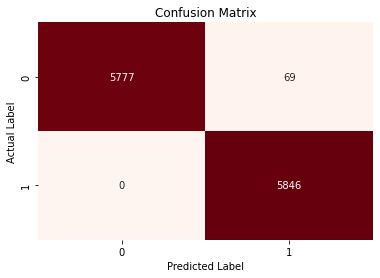


 Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5846
           1       0.99      1.00      0.99      5846

    accuracy                           0.99     11692
   macro avg       0.99      0.99      0.99     11692
weighted avg       0.99      0.99      0.99     11692



AUC: 1.000


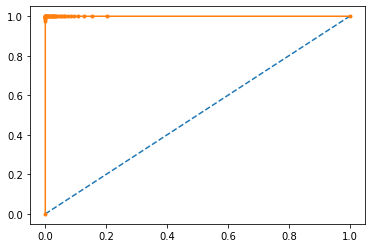




TEST METRICS


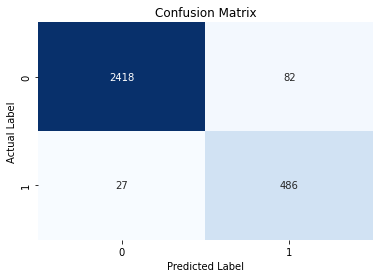


 Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2500
           1       0.86      0.95      0.90       513

    accuracy                           0.96      3013
   macro avg       0.92      0.96      0.94      3013
weighted avg       0.97      0.96      0.96      3013



AUC: 0.982


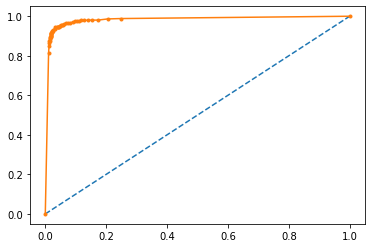



Cross Validation score for Bagged KNN Model: 
Bias Error: 0.022009117964973512
Variance Error: 0.006286953705525217



Comparision Table
   precision  recall  f1-score       Model    SET    AUC  Accuracy  \
0     1.0000  0.9882  0.994063  Bagged KNN  Train  1.000    0.9941   
1     0.9883  1.0000  0.994133  Bagged KNN  Train  1.000    0.9941   
0     0.9890  0.9672  0.977958  Bagged KNN   Test  0.982    0.9638   
1     0.8556  0.9474  0.899167  Bagged KNN   Test  0.982    0.9638   

   Bias Error  Variance Error  
0       0.022          0.0063  
1       0.022          0.0063  
0       0.022          0.0063  
1       0.022          0.0063  


In [ ]:
bag_KNN=KNeighborsClassifier(n_neighbors=2)
bag_KNN=BaggingClassifier(base_estimator=bag_KNN,n_estimators=25,random_state=1)
bag_KNN.fit(xtrain,trainlabels)
bag_KNN_ytrain_predict,bag_KNN_ytest_predict,bag_KNN_train_accuracy,bag_KNN_test_accuracy,bag_KNN_train_auc,bag_KNN_test_auc,bag_KNN_bias_error,bag_KNN_variance_error,bag_KNN_train_test_df=model_eval(bag_KNN,x,y,xtrain,xtest,trainlabels,testlabels,'Bagged KNN')

### Building a Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data_RF=data_final.copy()

In [ ]:
data_RF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10041 entries, 0 to 10040
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   10041 non-null  float64
 1   CC_Contacted_LY          10041 non-null  float64
 2   rev_per_month            10041 non-null  float64
 3   rev_growth_yoy           10041 non-null  float64
 4   Day_Since_CC_connect     10041 non-null  float64
 5   cashback                 10041 non-null  float64
 6   City_Tier                10041 non-null  object 
 7   Payment                  10041 non-null  object 
 8   Gender                   10041 non-null  object 
 9   Service_Score            10041 non-null  object 
 10  Account_user_count       10041 non-null  object 
 11  account_segment          10041 non-null  object 
 12  CC_Agent_Score           10041 non-null  object 
 13  Marital_Status           10041 non-null  object 
 14  Complain_ly           

In [ ]:
for i in data_RF.columns:
  if data_RF[i].dtype=='object':
    data_RF[i]=data_RF[i].astype(float)

In [ ]:
data_RF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10041 entries, 0 to 10040
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   10041 non-null  float64
 1   CC_Contacted_LY          10041 non-null  float64
 2   rev_per_month            10041 non-null  float64
 3   rev_growth_yoy           10041 non-null  float64
 4   Day_Since_CC_connect     10041 non-null  float64
 5   cashback                 10041 non-null  float64
 6   City_Tier                10041 non-null  float64
 7   Payment                  10041 non-null  float64
 8   Gender                   10041 non-null  float64
 9   Service_Score            10041 non-null  float64
 10  Account_user_count       10041 non-null  float64
 11  account_segment          10041 non-null  float64
 12  CC_Agent_Score           10041 non-null  float64
 13  Marital_Status           10041 non-null  float64
 14  Complain_ly           

In [ ]:
rfx=data_RF.drop('Churn',axis=1)
rfy=data_RF.pop('Churn')
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,trainlabels,testlabels=train_test_split(rfx,rfy,test_size=.3,random_state=1)

### Applying Smote technique to balance the dependent variable

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=1)
xtrain1,trainlabels1=smote.fit_sample(xtrain,trainlabels)

### By running the random forest with the below mentioned parameters

paramgrid={'max_depth':[12,14,16],
           'max_features':[10,12,14],
           'min_samples_leaf':[300,350,400],
           'min_samples_split':[500,550,600],
           'n_estimators':[250,300,350]
           }

We observe that the best param is 
{'max_depth': 14,
 'max_features': 12,
 'min_samples_leaf': 300,
 'min_samples_split': 550,
 'n_estimators': 300}

so we are directly using that in the Random Forest

In [ ]:
rf=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn import metrics
# paramgrid={'max_depth':[12,14,16],
#            'max_features':[10,12,14],
#            'min_samples_leaf':[300,350,400],
#            'min_samples_split':[500,550,600],
#            'n_estimators':[250,300,350]
#            }
paramgrid={'max_depth':[14],
           'max_features':[12],
           'min_samples_leaf':[300],
           'min_samples_split':[550],
           'n_estimators':[300]
           }

gridsearch=GridSearchCV(estimator=rf,param_grid=paramgrid,cv=5)

In [ ]:
gridsearch.fit(xtrain1,trainlabels1)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
best_grid=gridsearch.best_params_
best_grid

{'max_depth': 14,
 'max_features': 12,
 'min_samples_leaf': 300,
 'min_samples_split': 550,
 'n_estimators': 300}

In [ ]:
gridsearch.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=300, min_samples_split=550,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
best_grid=gridsearch.best_estimator_
from sklearn.metrics import confusion_matrix,classification_report

TRAIN METRICS
Accuracy of Train set for Random Forest is 0.8305
Accuracy of Test set for Random Forest is 0.8287




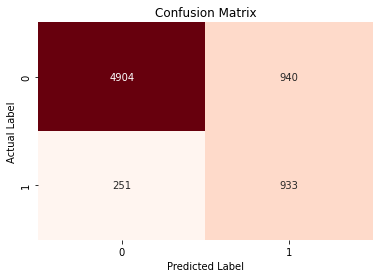


 Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89      5844
         1.0       0.50      0.79      0.61      1184

    accuracy                           0.83      7028
   macro avg       0.72      0.81      0.75      7028
weighted avg       0.87      0.83      0.84      7028



AUC: 0.898


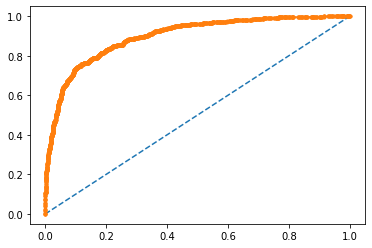




TEST METRICS


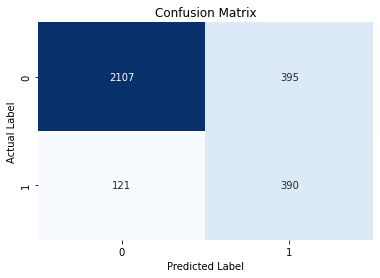


 Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89      2502
         1.0       0.50      0.76      0.60       511

    accuracy                           0.83      3013
   macro avg       0.72      0.80      0.75      3013
weighted avg       0.87      0.83      0.84      3013



AUC: 0.890


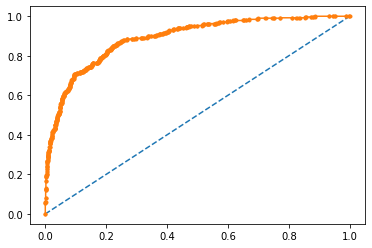



Cross Validation score for Random Forest Model: 
Bias Error: 0.1237916821999746
Variance Error: 0.004020628098150382



Comparision Table
     precision  recall  f1-score          Model    SET     AUC  Accuracy  \
0.0     0.9513  0.8392  0.891717  Random Forest  Train  0.8983    0.8305   
1.0     0.4981  0.7880  0.610402  Random Forest  Train  0.8983    0.8305   
0.0     0.9457  0.8421  0.890909  Random Forest   Test  0.8900    0.8287   
1.0     0.4968  0.7632  0.601852  Random Forest   Test  0.8900    0.8287   

     Bias Error  Variance Error  
0.0      0.1238           0.004  
1.0      0.1238           0.004  
0.0      0.1238           0.004  
1.0      0.1238           0.004  


In [ ]:
rf_ytrain_predict,rf_ytest_predict,rf_train_accuracy,rf_test_accuracy,rf_train_auc,rf_test_auc,rf_bias_error,rf_variance_error,rf_train_test_df=model_eval(best_grid,rfx,rfy,xtrain,xtest,trainlabels,testlabels,'Random Forest')

## Best Features

In [ ]:
# pd.Series(gb_tuned.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',orient='V',figsize=(18,5))


o=pd.DataFrame(gb_tuned.feature_importances_,index=x.columns)
o.reset_index(inplace=True)
o.columns=['Features','Values']
o.sort_values(by='Values',ascending=False,inplace=True)
o['percent']=round(o.Values*100,2)
o

,Features,Values,percent
0,Tenure,0.283504,28.35
11,Complain_ly,0.102805,10.28
6,Account_user_count,0.075901,7.59
14,Day_Since_CC_connect,0.069763,6.98
8,CC_Agent_Score,0.060532,6.05
7,account_segment,0.058267,5.83
9,Marital_Status,0.051446,5.14
10,rev_per_month,0.046627,4.66
13,coupon_used_for_payment,0.044589,4.46
12,rev_growth_yoy,0.036175,3.62


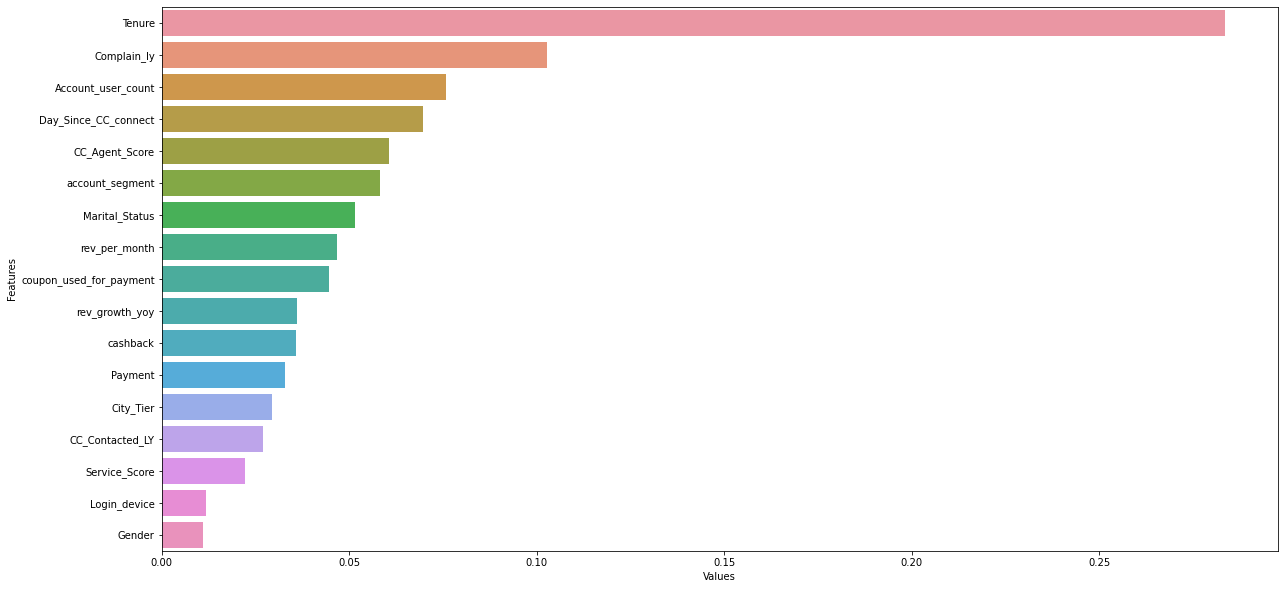

In [ ]:

plt.figure(figsize=(20,10))
order=o.sort_values(by='Values',ascending=False).Features.values
sns.barplot(x=o.Values,y=o.Features,data=o,order=order)
plt.show()

### Churn vs Independent Variables

[]

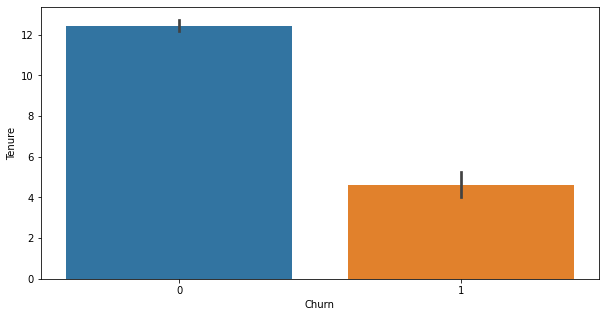

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=data.Churn,y=data.Tenure)
plt.plot()

### Observation:
Higher the Tenure lower the churning.

[]

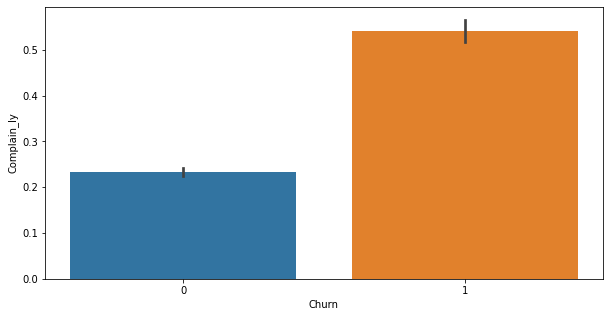

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=data.Churn,y=data.Complain_ly)
plt.plot()

### Observation:
Higher the complain, Higher the Churn

[]

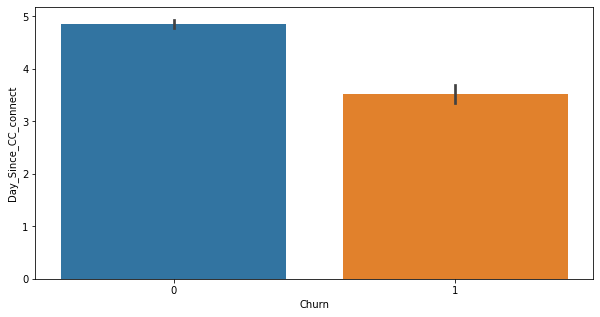

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=data.Churn,y=data.Day_Since_CC_connect)
plt.plot()

### Observation:
Higher the contact with customer care lower the churn, so customer care should be easily available for the customers

In [ ]:
# plt.figure(figsize=(10,5))
pd.crosstab(data.Marital_Status,data.Churn)
# plt.plot()

Churn,0,1
Marital_Status,,
1,2298,839
2,4784,639
3,1264,217


### Observation: 
High churn is observed for Single customers even though the highest customers counts are for Married.

In [ ]:
pd.crosstab(data.account_segment,data.Churn)

Churn,0,1
account_segment,,
1,3249,371
2,703,35
3,425,36
4,2742,1020
5,1227,233


### Observation:
Even though Customers using Regular plus is the second highest their churning is the highest.

In [ ]:
insights=data_final.merge(data_clus_new[['KNN_2','Churn','Churn_count','Churn_percentage']],on=['KNN_2','Churn'],how='inner')
insights.head()

,Tenure,CC_Contacted_LY,rev_per_month,rev_growth_yoy,Day_Since_CC_connect,cashback,City_Tier,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,Complain_ly,coupon_used_for_payment,Login_device,Churn,KNN_2,Churn_count,Churn_percentage
0,4.0,1.945910,2.302585,11.0,5.0,5.080969,3,1,0,3,3,1,2,1,1,1,1,1,0,501,0.179763
1,0.0,2.197225,2.079442,15.0,0.0,4.803201,1,3,1,3,4,4,3,1,1,0,1,1,0,501,0.179763
2,0.0,2.564949,1.386294,11.0,3.0,4.872139,1,2,1,2,3,4,5,1,0,1,1,1,0,501,0.179763
3,2.0,2.484907,1.609438,14.0,0.0,4.802873,3,5,1,2,3,1,2,3,0,0,1,1,0,501,0.179763
4,0.0,1.945910,1.386294,16.0,0.0,4.819717,1,2,1,3,3,4,2,3,1,2,1,1,0,501,0.179763


### Cluster VS Gender

In [ ]:
pd.crosstab(columns=insights.KNN_2,index=[insights.Gender,insights.Churn],normalize='index').round(4)*100

KNN_2             0      1      2      3     4     5
Gender Churn                                        
0.0    0.0    27.15  26.13  21.82  23.56  1.35  0.00
       1.0    30.56  29.57  24.92  13.46  1.50  0.00
1.0    0.0    27.55  25.73  20.20  23.48  1.32  1.72
       1.0    29.00  36.60  18.39  12.63  1.37  2.01

### Cluster VS Marital_Status

In [ ]:
pd.crosstab(columns=insights.KNN_2,index=[insights.Marital_Status,insights.Churn],normalize='index').round(4)*100

KNN_2                     0      1      2      3     4     5
Marital_Status Churn                                        
1.0            0.0    30.77  26.24  19.02  21.67  1.44  0.87
               1.0    32.66  30.51  24.55   8.94  2.03  1.31
2.0            0.0    25.82  25.75  21.82  24.18  1.38  1.05
               1.0    25.20  39.28  17.68  15.81  0.63  1.41
3.0            0.0    27.22  25.79  20.49  24.29  0.95  1.27
               1.0    30.41  32.72  14.75  19.82  1.38  0.92

### Cluster vs Complain

In [ ]:
pd.crosstab(columns=insights.KNN_2,index=[insights.Complain_ly,insights.Churn],normalize='index').round(4)*100

KNN_2                  0      1      2      3     4     5
Complain_ly Churn                                        
0.0         0.0    26.82  26.24  21.27  23.40  1.28  0.98
            1.0    29.91  35.04  16.82  15.15  1.80  1.28
1.0         0.0    29.26  24.74  19.46  23.87  1.49  1.18
            1.0    29.26  33.30  24.02  11.03  1.09  1.31

### Cluster VS Tenure

In [ ]:
pd.crosstab(columns=insights.Tenure,index=[insights.KNN_2,insights.Churn],normalize='index').round(4)*100

Tenure       0.00000   1.00000   2.00000   3.00000   4.00000   5.00000   \
KNN_2 Churn                                                               
0     0.0       12.42     10.37      4.68      4.37      4.42      5.38   
      1.0       51.30     28.14      2.59      0.60      2.40      0.80   
1     0.0        4.77      6.71      3.61      4.30      2.73      3.70   
      1.0       31.49     39.62      1.38      2.94      2.94      1.38   
2     0.0        5.52     10.34      3.28      4.31      5.63      4.89   
      1.0       35.90     43.87      2.28      2.85      0.85      1.42   
3     0.0        0.82      2.14      1.99      3.11      3.06      2.09   
      1.0       16.44     26.48      0.00      1.37      1.83      4.11   
4     0.0        0.00      0.00      0.00      0.00      0.00      0.00   
      1.0        0.00      0.00      0.00      0.00      0.00      0.00   
5     0.0        5.81      4.65      4.65      2.33      1.16     10.47   
      1.0       36.36     45.45      0.00      4.55      4.55      4.55   

Tenure       6.00000   7.00000   8.00000   9.00000   10.00000  11.00000  \
KNN_2 Churn                                                               
0     0.0        4.90      6.56      6.08      4.37      3.67      4.59   
      1.0        0.00      2.79      1.20      0.40      0.00      0.80   
1     0.0        3.01      3.19      4.86      5.69      4.72      3.56   
      1.0        1.90      2.08      0.69      0.69      1.21      1.04   
2     0.0        3.28      4.08      4.48      4.66      3.45      3.39   
      1.0        0.00      0.85      0.85      1.71      1.99      0.00   
3     0.0        3.31      4.33      5.61      5.71      5.20      4.03   
      1.0        1.83      0.00      3.65      2.28      5.02      3.65   
4     0.0        0.00      0.00      0.00      0.00      0.00      0.00   
      1.0        0.00      0.00      0.00      0.00      0.00      0.00   
5     0.0        6.98      4.65      4.65      3.49      1.16      5.81   
      1.0        0.00      0.00      0.00      0.00      0.00      0.00   

Tenure       11.12033  12.00000  13.00000  14.00000  15.00000  16.00000  \
KNN_2 Churn                                                               
0     0.0        2.06      3.11      1.92      2.06      1.88      1.57   
      1.0        3.19      0.00      2.20      1.60      0.20      0.00   
1     0.0        2.22      3.19      3.70      3.52      3.75      3.93   
      1.0        2.42      0.52      1.21      2.08      0.69      0.69   
2     0.0        1.21      4.02      3.16      4.14      2.76      2.59   
      1.0        3.13      0.57      0.57      0.00      0.85      0.85   
3     0.0        2.75      4.79      5.86      4.49      4.08      3.52   
      1.0        3.20      2.28      1.37      0.00      4.11      4.57   
4     0.0        0.00      0.00      0.00      0.00      0.00      0.00   
      1.0        0.00      0.00      0.00      0.00      0.00      0.00   
5     0.0        0.00      2.33      1.16      3.49      4.65      0.00   
      1.0        0.00      0.00      0.00      0.00      0.00      4.55   

Tenure       17.00000  18.00000  19.00000  20.00000  21.00000  22.00000  \
KNN_2 Churn                                                               
0     0.0        1.53      2.36      1.79      1.49      1.22      1.09   
      1.0        0.00      0.60      0.40      0.40      0.40      0.00   
1     0.0        2.45      2.73      2.41      1.99      2.13      2.17   
      1.0        0.35      0.69      1.73      1.56      0.69      0.00   
2     0.0        2.18      2.13      3.05      2.30      1.61      0.92   
      1.0        0.00      0.00      0.00      0.85      0.57      0.00   
3     0.0        2.65      2.91      3.67      2.55      1.78      2.19   
      1.0        1.37      1.83      4.11      6.39      4.11      0.00   
4     0.0        0.00      0.00      0.00      0.00      0.00      0.00   
      1.0        0.00 

### Account User count VS Account Segment

In [ ]:
pd.crosstab(columns=insights.account_segment,index=[insights.Account_user_count,insights.Churn],normalize='index').round(4)*100

account_segment             1.0    2.0   3.0    4.0    5.0
Account_user_count Churn                                  
1.0                0.0    39.73  10.13  2.13  38.93   9.07
                   1.0    19.05  16.67  0.00  54.76   9.52
2.0                0.0    39.95   9.13  3.42  38.13   9.36
                   1.0    26.19  11.90  0.00  52.38   9.52
3.0                0.0    39.39   8.17  5.24  32.96  14.24
                   1.0    21.98   1.76  2.42  60.44  13.41
4.0                0.0    37.92   8.64  5.26  32.58  15.61
                   1.0    20.76   1.27  1.55  61.16  15.25
5.0                0.0    38.64   8.29  5.72  30.60  16.75
                   1.0    21.90   1.15  1.73  61.38  13.83
6.0                0.0    49.74   3.63  5.70  26.94  13.99
                   1.0    28.71   1.98  7.92  53.47   7.92

### Account Segment VS Gender

In [ ]:
pd.crosstab(columns=insights.account_segment,index=[insights.Complain_ly,insights.Churn],normalize='index').round(4)*100

account_segment      1.0    2.0   3.0    4.0    5.0
Complain_ly Churn                                  
0.0         0.0    38.29   7.77  5.08  34.93  13.93
            1.0    23.36   1.93  1.67  55.46  17.59
1.0         0.0    41.02  10.57  5.13  26.03  17.25
            1.0    20.63   2.18  2.51  64.19  10.48

### Account Segment VS City Tier

In [ ]:
pd.crosstab(columns=insights.account_segment,index=[insights.Complain_ly,insights.Churn],normalize='index').round(4)*100

account_segment      1.0    2.0   3.0    4.0    5.0
Complain_ly Churn                                  
0.0         0.0    38.29   7.77  5.08  34.93  13.93
            1.0    23.36   1.93  1.67  55.46  17.59
1.0         0.0    41.02  10.57  5.13  26.03  17.25
            1.0    20.63   2.18  2.51  64.19  10.48